# Hello, [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html)!

## What is Matplotlib?

- in short: allows for the creations of plots from data.
- according to their website: "Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible."

## What is Seaborn?

  - according to their website: "a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."

## Measurement Scales

- interval
  - discrete (ex: the outcome of throwing a dice / coin)
  - continuous (ex: time, money)
- ordinal
  - categories where order matterns (ex: grades, size of shirts)
- nominal
  - categories where there is no order (ex: colors)
- proportional
  - the data has proportions (ex: length, width, height, speed, Kelvin scale)
  - absolute zero
  - no negative value

> **Note**: Nominal and ordinal data are commonly referred to as **categorical data** while interval data is commonly referred to as **quantitative or numerical** data.

## The Machine Learning Pipeline

1.   Identify a problem / goal.
  - What Android application will be most profitable?
  - What career in development should I choose?
2.   Get data.
3.   Analyze data.
4.   Prepare data for modelling.
5.   ...



## Plots* and their characteristics


> **Note***: Plots and charts are used interchangeably throught this notebook.


- Line plot
  - show **continuous** values over a specified (equally spaced) **interval**
    - most often used with **dates** (time interval)
    - money values


- Bar plot
  - When you want to show the **frequency** of **nominal or ordinal** data.
  - Notice how **the bars don't touch** each other.


- Histogram
  - For visualizing the frequency of one continuous variable.
  - The bars touch each other.


- Pie chart
  - Show the **proportion** that each **category** contributes to the whole. Each category is a slice of a pie. The larger the slice, the larger the proportion.
  - Advice: Use pie charts only if the number of categories is <= 5.


- Stack plot / Area plot
  - Show the proportions in a pie chart over time.
  - Useful for cumulative quantities.


- Scatter plot
  - Show the relationship between two sets of values and see how they are correlated (how much know one value, gives information about another).
  - Mainly used to spot trends.

## All functions we'll go through

- Customize:
  - `plt.show()`: Display a plot **that has been created**.
  - `plt.rc`: Set parameters for plots. Check all of them [here](https://matplotlib.org/stable/api/matplotlib_configuration_api.html?highlight=rc#matplotlib.rcParams). The changes apply to all plots.
  - `plt.title(title: str)`: Set a title.
  - `plt.xlabel(lbl: str)`: Set a text to be displayed on the x axis.
  - `plt.ylabel(lbl: str)`: Set a text to be displayed on the y axis.
  - `plt.legend()`: Display a legend using **the predefined labels**.
  - `plt.grid()`: Display the plot in a grid.
  - `plt.tight_layout()`: fix padding issues. Used mainly when savig a plot.
  - `plt.savefig(filename: str)`: Save a plot to hard disk.
  - `plt.xticks()`: Set the current tick locations and labels of the x-axis.


- Line plots:
  - `plt.plot(x, y, [label, color, linewidth])`
  - `sns.lineplot(x=x, y=y)`
    - plot x against y. Optionally add a label.
    - the lengths of `x` and `y` must match


- Bar plots:
  - `plt.bar(x, y)`: Vertical bar chart
  - `plt.barh(x, y)`: Horizontal bar chart


## Imports and Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
DATA_PATH = '../DATA/survey_results_public.csv'
FIG_SIZE = (12, 8)
plt.rc('figure', figsize=FIG_SIZE)

## Get data

In [3]:
# Download the StackOverflow survey from 2021 - https://survey.stackoverflow.co/2021, into a file, named "tmp.zip".
!wget https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip -O tmp.zip

# Extract the data in the zip archive into a folder named "data".
!unzip tmp.zip -d ./data

# Remove the zip archive.
!rm tmp.zip

# Move the file, holding the data we're going to investigate into our DATA folder.
!mv "data/survey_results_public.csv" ../DATA

# Remove the folder created by the extraction of the zip file.
!rm -r "data"

--2024-10-05 09:30:20--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.72.206, 104.17.70.206, 104.17.71.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.72.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8825103 (8.4M) [application/zip]
Saving to: ‘tmp.zip’

tmp.zip             100%[===================>]   8.42M  19.5MB/s    in 0.4s    

2024-10-05 09:30:21 (19.5 MB/s) - ‘tmp.zip’ saved [8825103/8825103]

Archive:  tmp.zip
  inflating: ./data/README_2021.txt  
  inflating: ./data/so_survey_2021.pdf  
  inflating: ./data/survey_results_public.csv  
  inflating: ./data/survey_results_schema.csv  


## Line charts

In [4]:
# Plot median salaries against ages

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Median Developer Salaries by Age
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

# Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

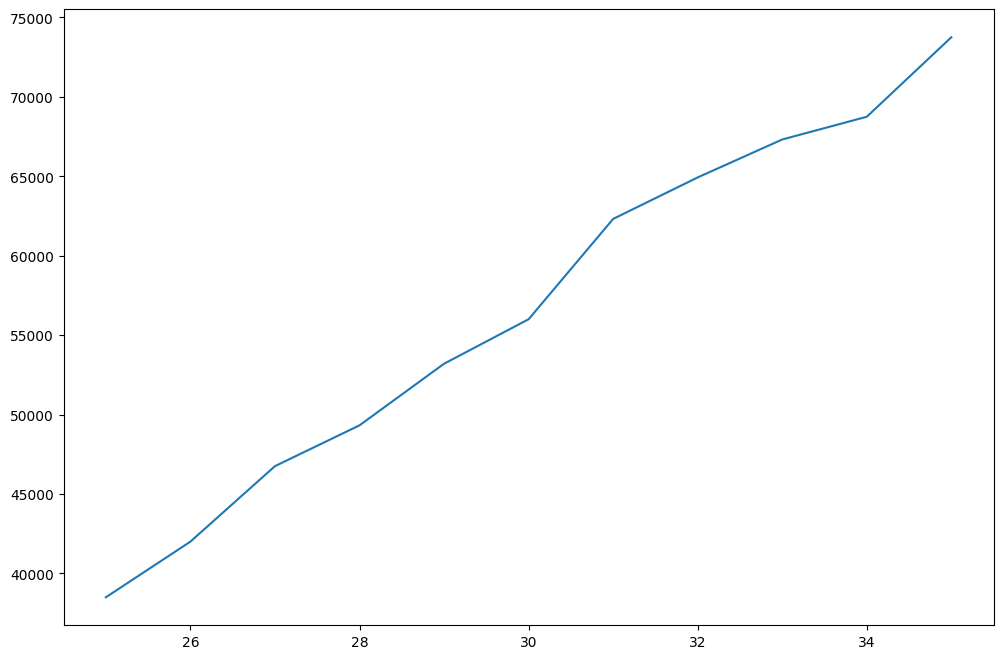

In [5]:
# Using matplotlib
plt.plot(ages_x, dev_y)
plt.show()

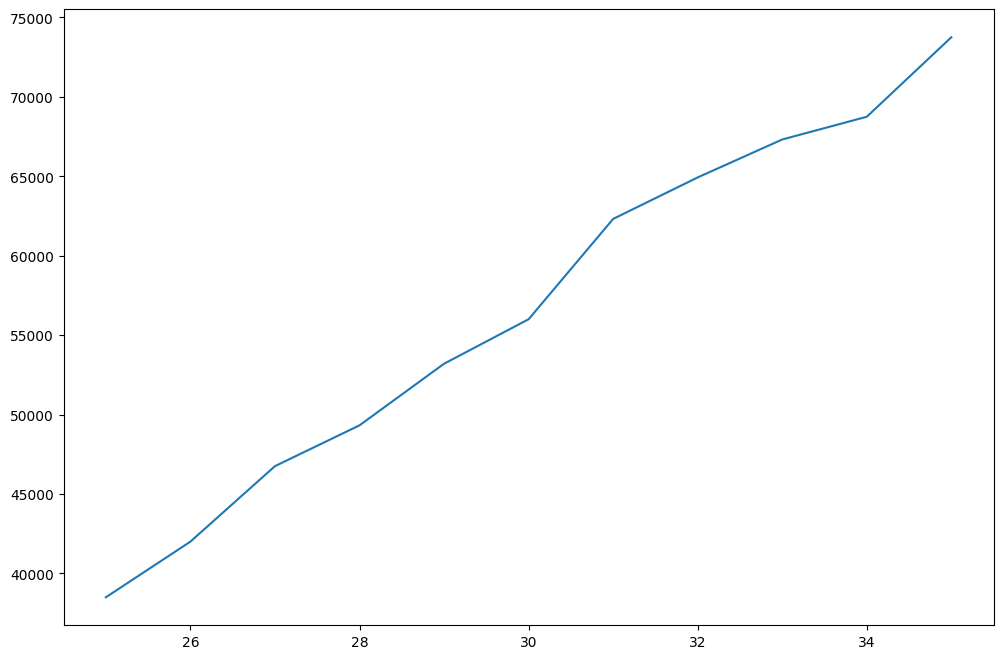

In [6]:
# Using seaborn
ax = sns.lineplot(x=ages_x, y=dev_y)

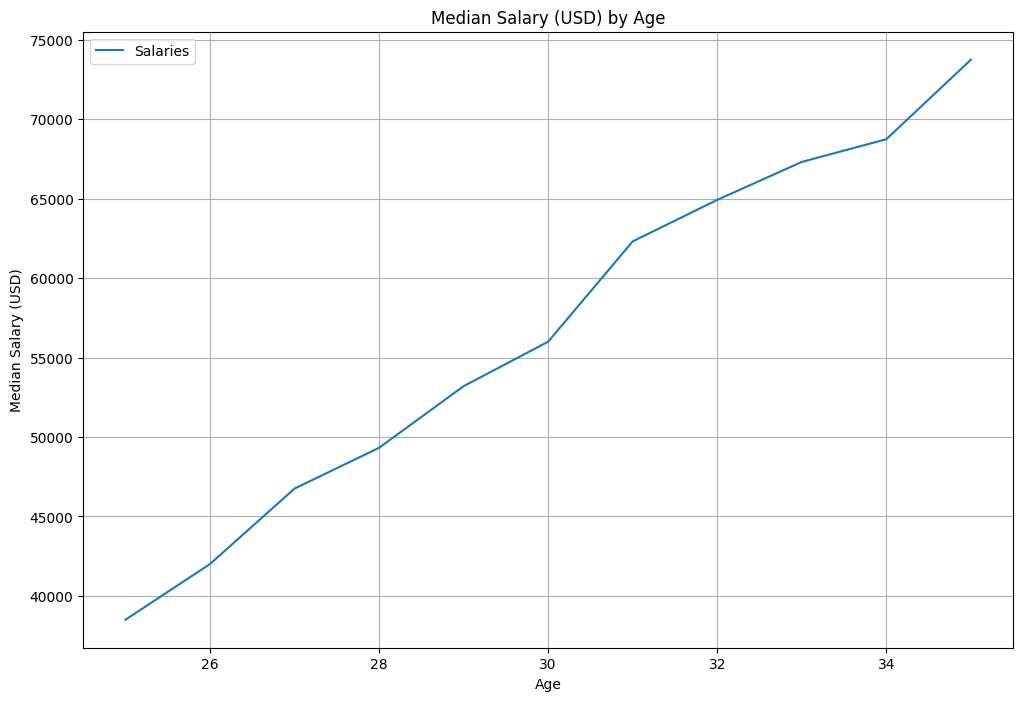

In [7]:
# Customize matplotlib plot

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.plot(ages_x, dev_y, label='Salaries')

plt.legend()
plt.grid()
plt.show()

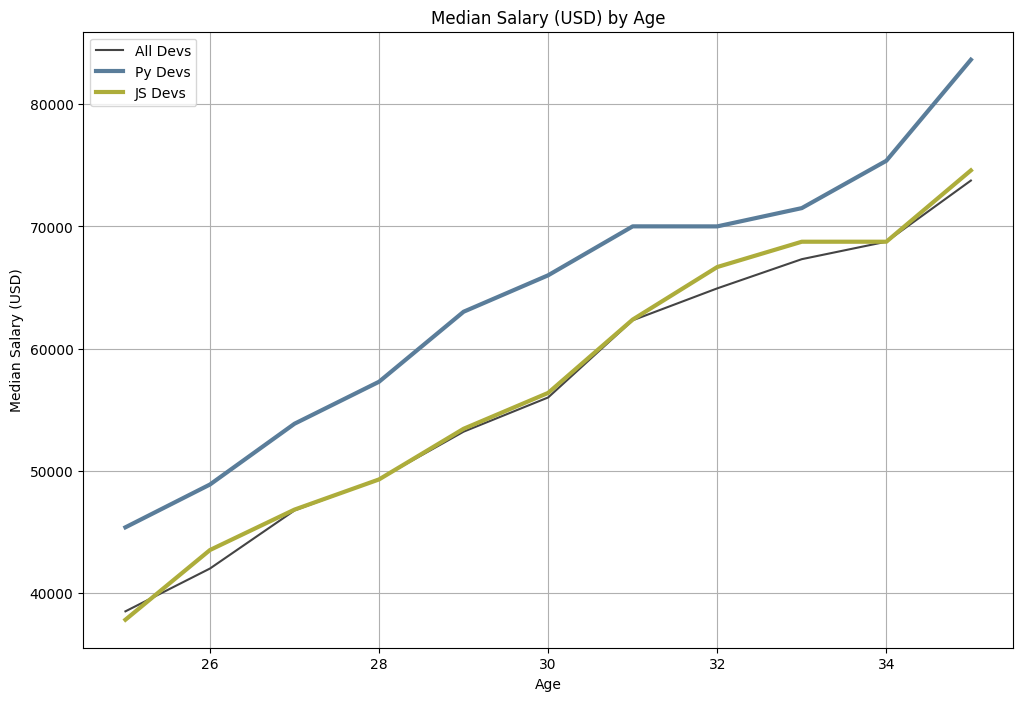

In [8]:
# Multiple plots on a single figure using matplotlib.
# The order of the plots matters.

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.plot(ages_x, dev_y, color='#444444', label='All Devs')
# plt.plot(ages_x, dev_y, color='r', label='All Devs')
plt.plot(ages_x, py_dev_y, color='#5a7d9a', linewidth=3, label='Py Devs')
plt.plot(ages_x, js_dev_y, color='#adad3b', linewidth=3, label='JS Devs')

plt.legend()
plt.grid()
plt.show()

In [9]:
# Multiple plots on a single figure using seaborn.
# Notice how we have to use a dataframe.

age_sal_df = pd.DataFrame({'Age': ages_x, 'All devs': dev_y, 'Py devs': py_dev_y, 'JS devs': js_dev_y})
age_sal_df

,Age,All devs,Py devs,JS devs
0,25,38496,45372,37810
1,26,42000,48876,43515
2,27,46752,53850,46823
3,28,49320,57287,49293
4,29,53200,63016,53437
5,30,56000,65998,56373
6,31,62316,70003,62375
7,32,64928,70000,66674
8,33,67317,71496,68745
9,34,68748,75370,68746


In [10]:
age_sal_df = age_sal_df.set_index('Age')
age_sal_df

,All devs,Py devs,JS devs
Age,,,
25,38496,45372,37810
26,42000,48876,43515
27,46752,53850,46823
28,49320,57287,49293
29,53200,63016,53437
30,56000,65998,56373
31,62316,70003,62375
32,64928,70000,66674
33,67317,71496,68745


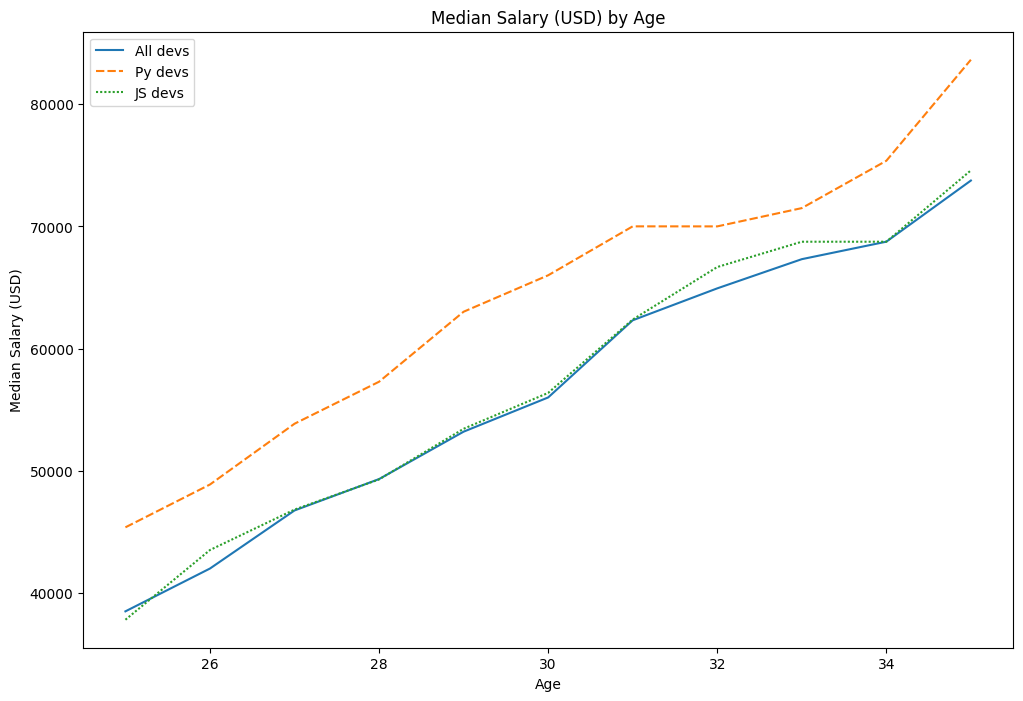

In [11]:
ax = sns.lineplot(data=age_sal_df)
ax.set_title('Median Salary (USD) by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Median Salary (USD)')
plt.show()

In [12]:
# We can change the styles of the plots!
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

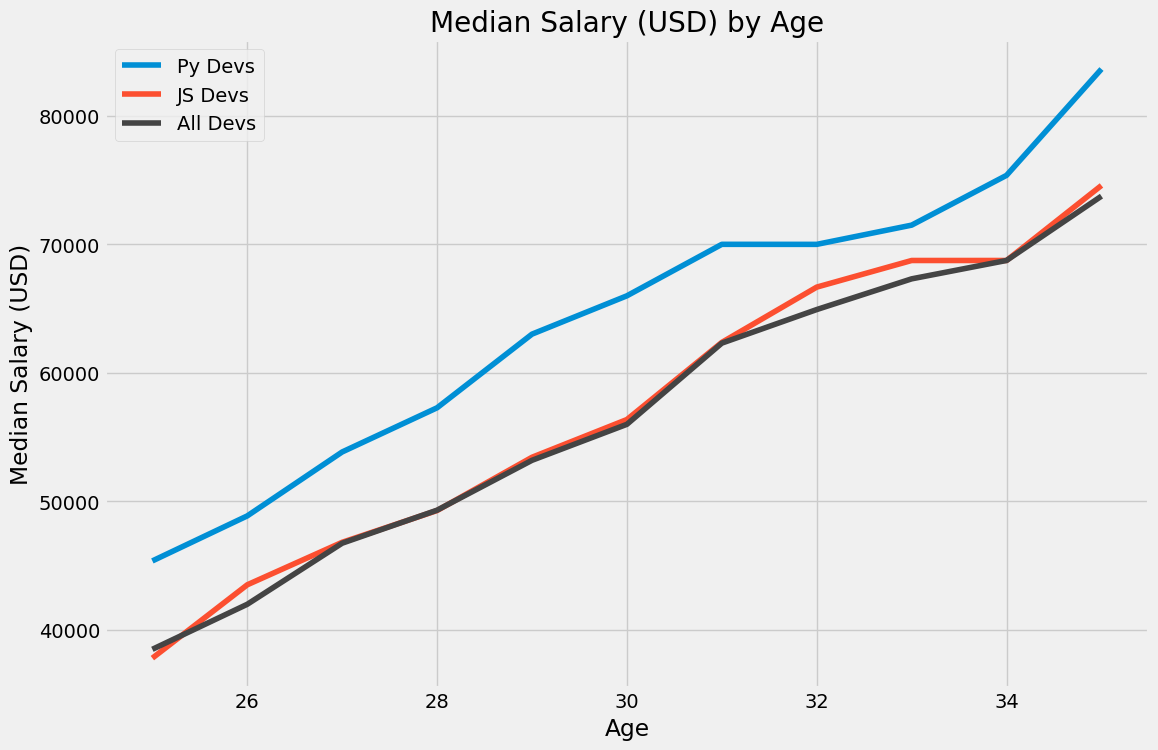

In [13]:
plt.style.use('fivethirtyeight')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.plot(ages_x, py_dev_y, label='Py Devs')
plt.plot(ages_x, js_dev_y, label='JS Devs')
plt.plot(ages_x, dev_y, color='#444444', label='All Devs')

plt.legend()
plt.show()

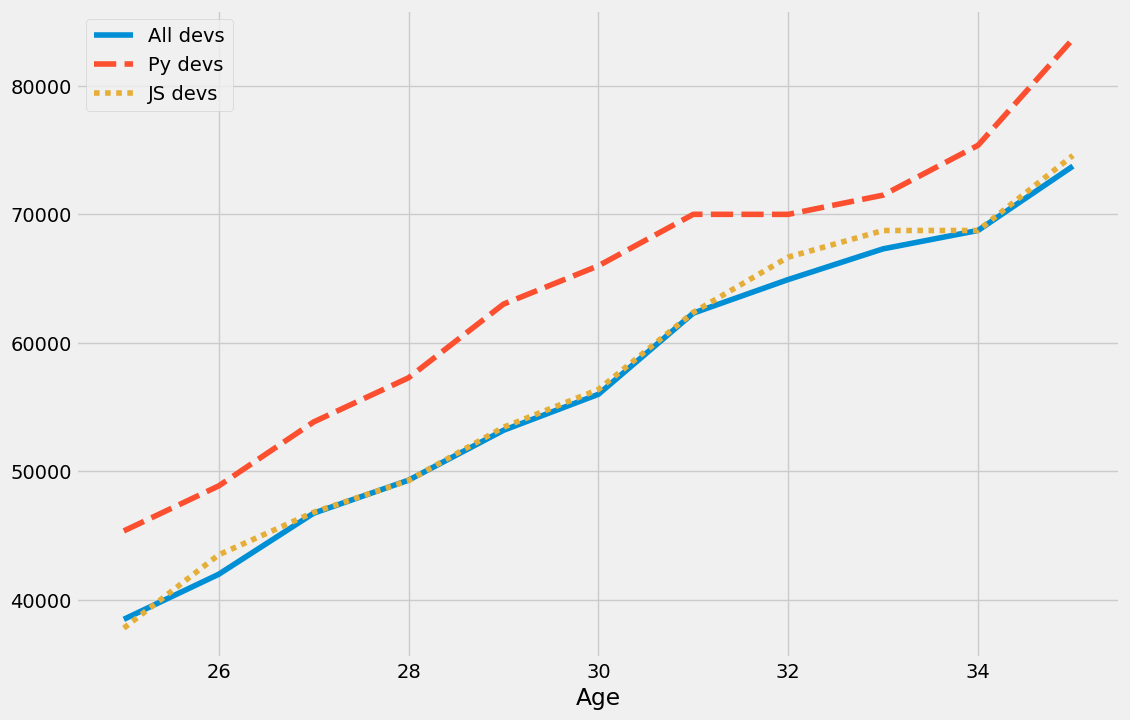

In [14]:
# Any change in matplotlib parameters will affect seaborn.
ax = sns.lineplot(data=age_sal_df)

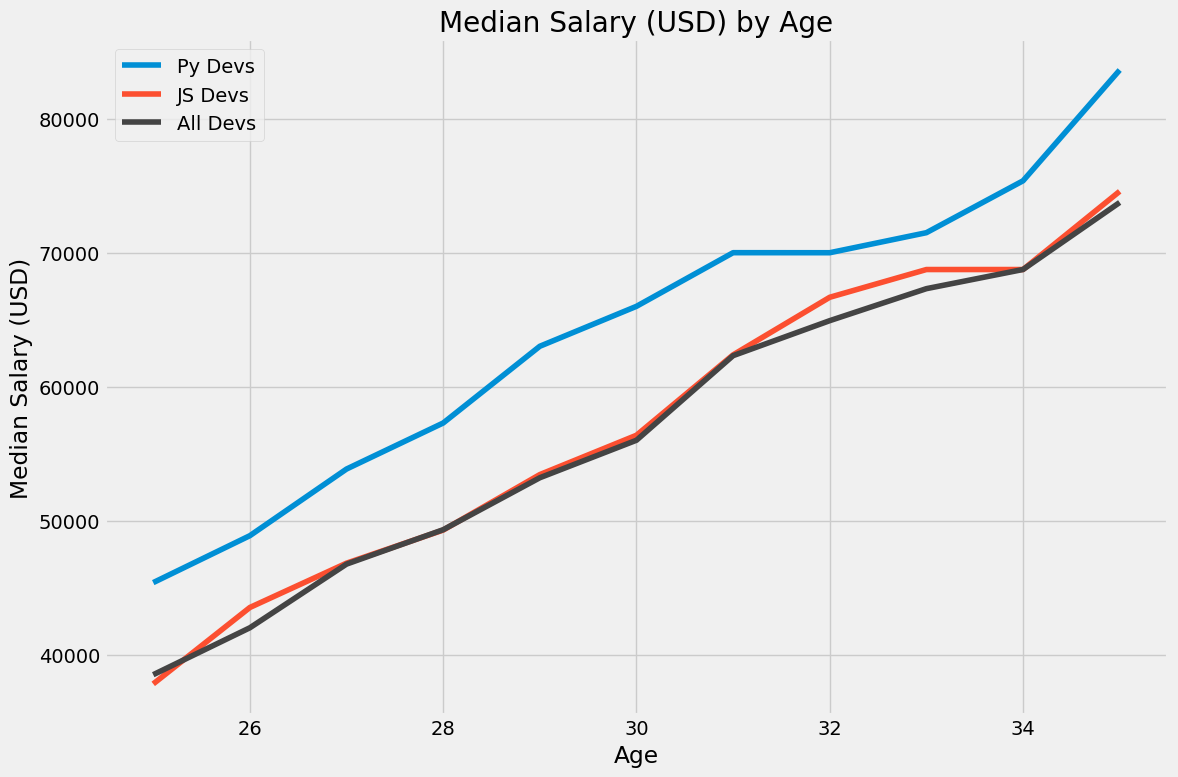

In [15]:
# Save the plot to png using code (instead of right click/Save Image As)
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.plot(ages_x, py_dev_y, label='Py Devs')
plt.plot(ages_x, js_dev_y, label='JS Devs')
plt.plot(ages_x, dev_y, color='#444444', label='All Devs')

plt.legend()
plt.tight_layout()
plt.savefig('plot.png')

## Bar Charts

In [16]:
plt.style.use('seaborn-v0_8-darkgrid')

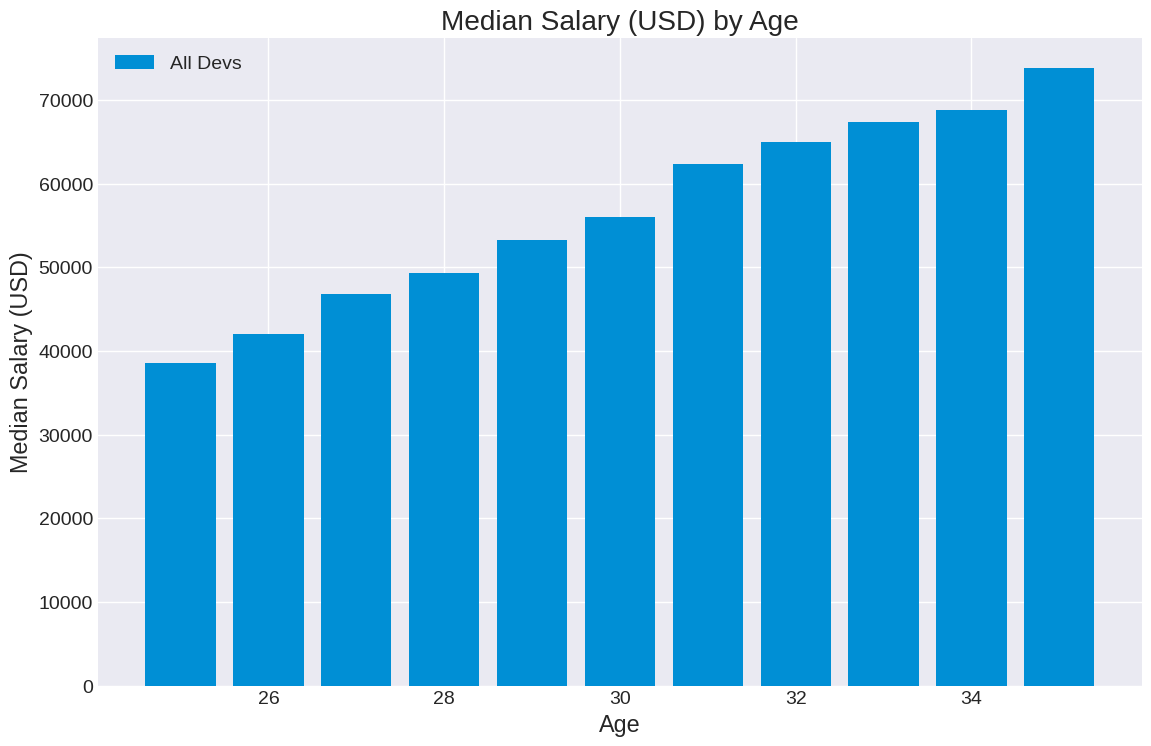

In [17]:
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.bar(ages_x, dev_y, label='All Devs')

plt.legend()
plt.show()

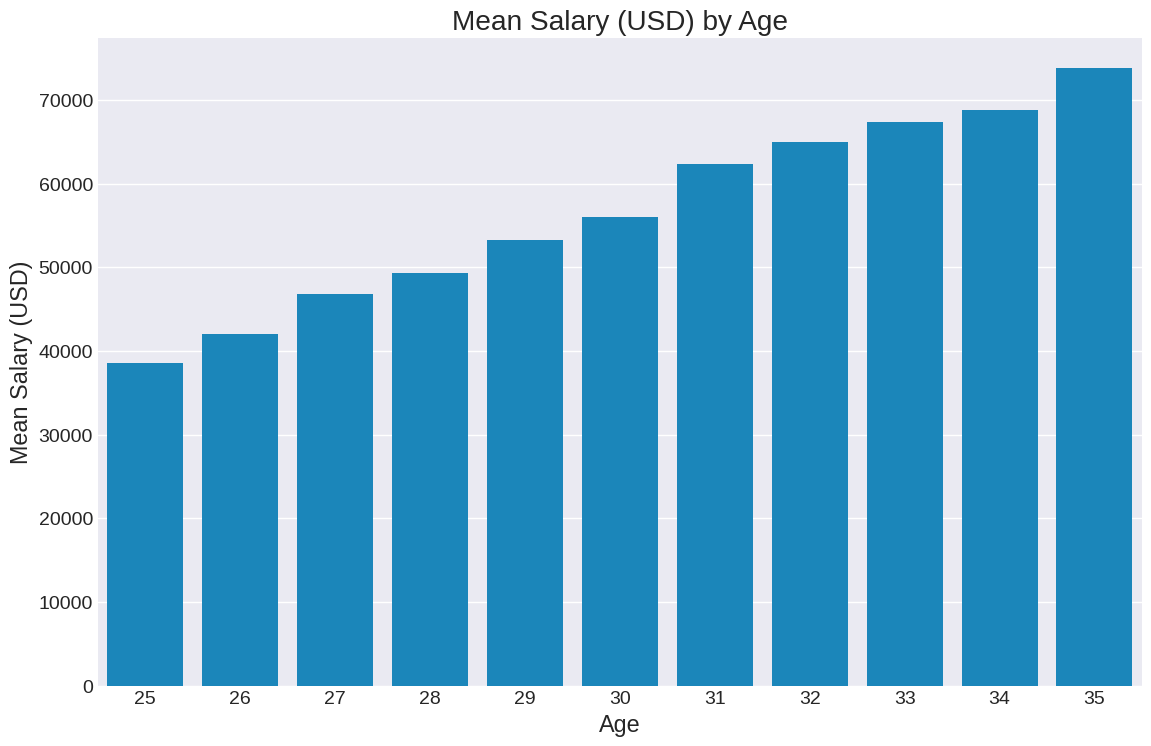

In [18]:
ax = sns.barplot(x=ages_x, y=dev_y)
ax.set_title('Mean Salary (USD) by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Mean Salary (USD)')
plt.show()

We can overlay different types of plots as well.

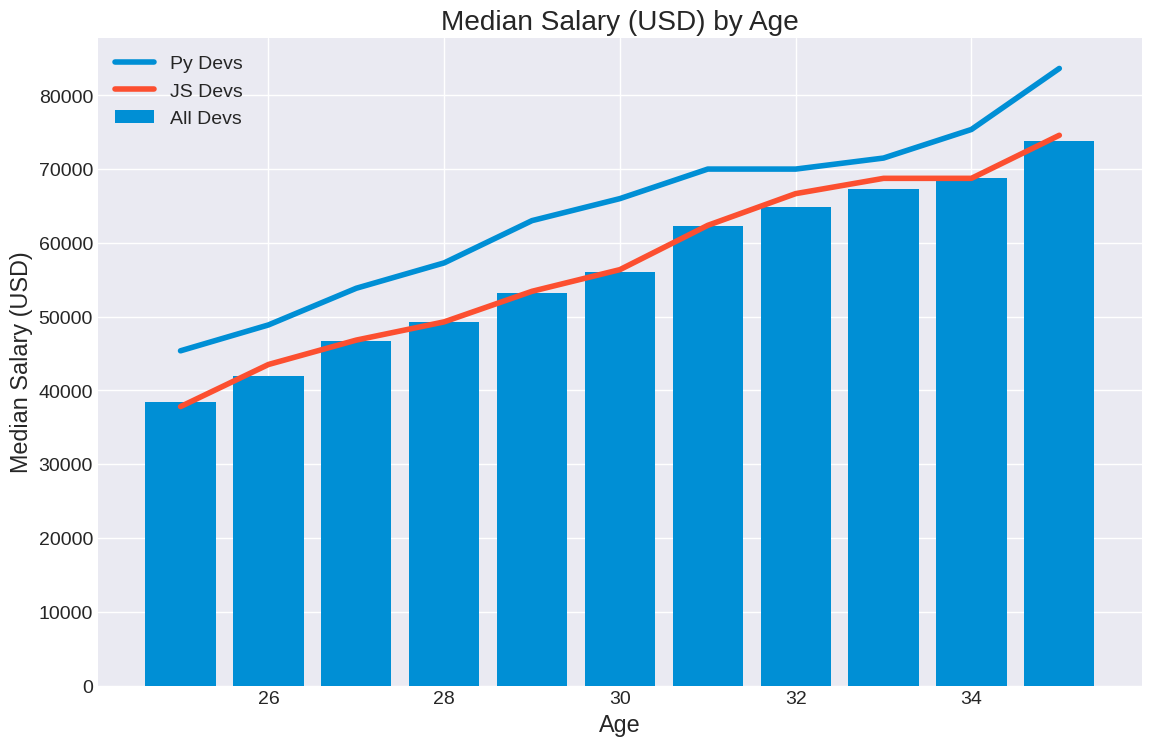

In [19]:
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.bar(ages_x, dev_y, label='All Devs')
plt.plot(ages_x, py_dev_y, label='Py Devs')
plt.plot(ages_x, js_dev_y, label='JS Devs')

plt.legend()
plt.show()

Plot 3 bar plots side-by-side depending on the type of developer.

In [20]:
# We have to use an offset of the x-axis for every new plot.
# Get the indexes so we can offset them.
x_idxs = np.arange(len(ages_x))
x_idxs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
# Set a width for each bar.
BAR_WIDTH = 0.25

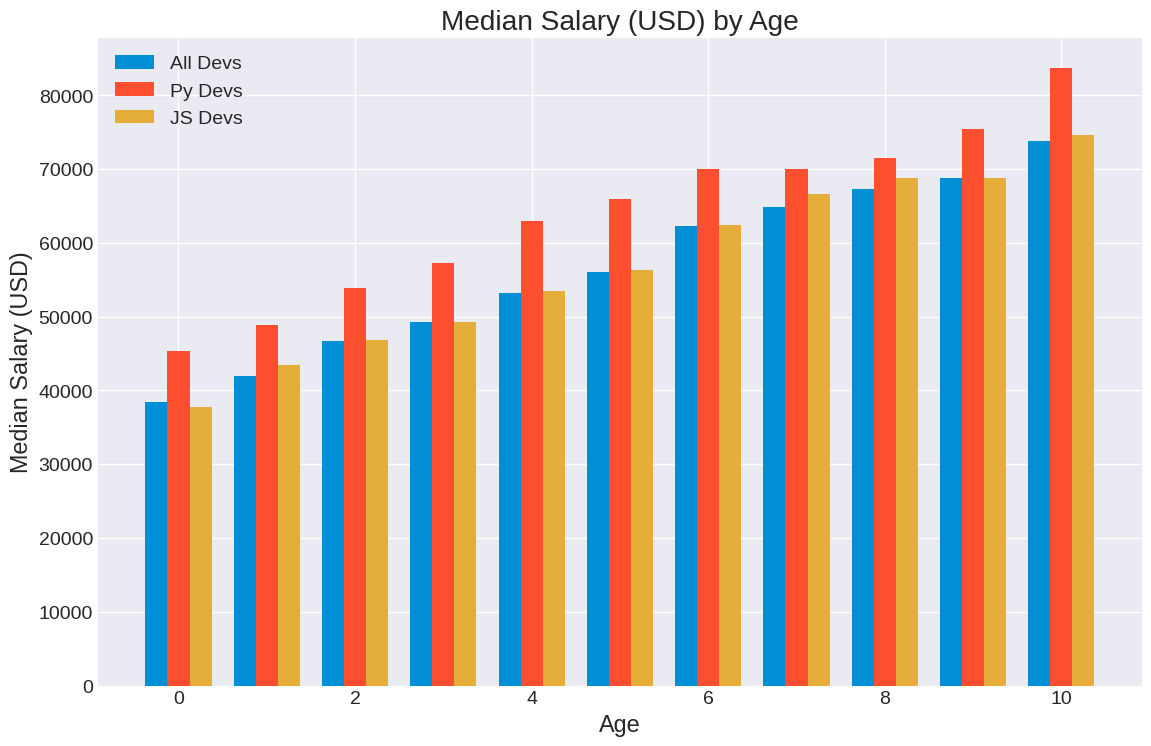

In [22]:
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.bar(x_idxs - BAR_WIDTH, dev_y, width=BAR_WIDTH, label='All Devs')
plt.bar(x_idxs, py_dev_y, width=BAR_WIDTH, label='Py Devs')
plt.bar(x_idxs + BAR_WIDTH, js_dev_y, width=BAR_WIDTH, label='JS Devs')

plt.legend()
plt.show()

However, now on the x-axis we have indexes instead of ages. In order to fix this, we'll use the `xticks()` function.

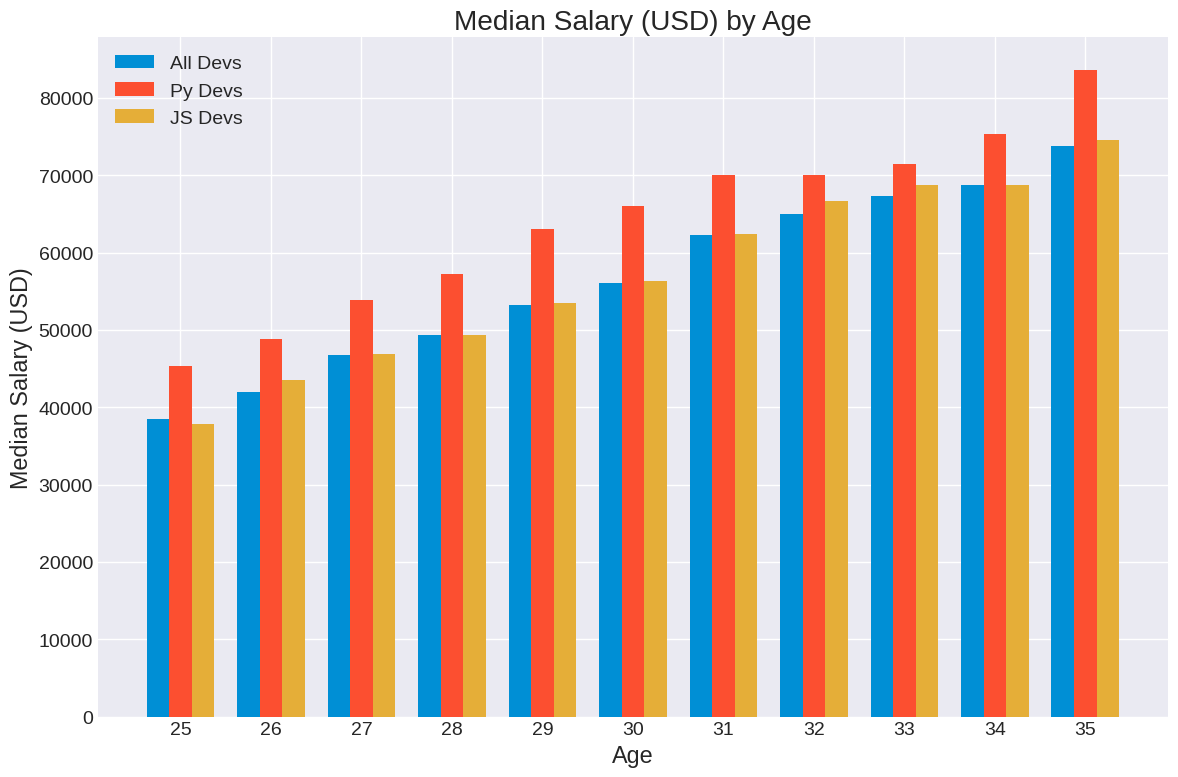

In [23]:
plt.figure(figsize=FIG_SIZE)
plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.bar(x_idxs - BAR_WIDTH, dev_y, width=BAR_WIDTH, label='All Devs')
plt.bar(x_idxs, py_dev_y, width=BAR_WIDTH, label='Py Devs')
plt.bar(x_idxs + BAR_WIDTH, js_dev_y, width=BAR_WIDTH, label='JS Devs')

plt.legend()
plt.xticks(ticks=x_idxs, labels=ages_x)
plt.tight_layout()

Let's analyse the data for the languages each person worked with. We want to create a bar chart of the most popular programming languages.

In [24]:
df = pd.read_csv(DATA_PATH, index_col='ResponseId')
df.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [25]:
# Get only the responses with a value in the `LanguageHaveWorkedWith` column.
cond = ~df['LanguageHaveWorkedWith'].isna()
df_for_lang = df.loc[cond, ['LanguageHaveWorkedWith']]
df_for_lang

,LanguageHaveWorkedWith
ResponseId,
1,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
2,JavaScript;Python
3,Assembly;C;Python;R;Rust
4,JavaScript;TypeScript
5,Bash/Shell;HTML/CSS;Python;SQL
...,...
83434,Java;JavaScript;Kotlin;Objective-C;TypeScript
83435,Clojure;Kotlin;SQL
83437,Groovy;Java;Python


In [26]:
df_for_lang = df_for_lang.applymap(lambda resp: resp.split(';'))
df_for_lang

/tmp/ipykernel_13393/1977598514.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_for_lang = df_for_lang.applymap(lambda resp: resp.split(';'))


,LanguageHaveWorkedWith
ResponseId,
1,"[C++, HTML/CSS, JavaScript, Objective-C, PHP, ..."
2,"[JavaScript, Python]"
3,"[Assembly, C, Python, R, Rust]"
4,"[JavaScript, TypeScript]"
5,"[Bash/Shell, HTML/CSS, Python, SQL]"
...,...
83434,"[Java, JavaScript, Kotlin, Objective-C, TypeSc..."
83435,"[Clojure, Kotlin, SQL]"
83437,"[Groovy, Java, Python]"


In [27]:
languages = list(df_for_lang['LanguageHaveWorkedWith'])
languages[0]

['C++', 'HTML/CSS', 'JavaScript', 'Objective-C', 'PHP', 'Swift']

In [28]:
languages = np.concatenate(languages)
languages

array(['C++', 'HTML/CSS', 'JavaScript', ..., 'HTML/CSS', 'Java',
       'JavaScript'], dtype='<U11')

In [29]:
language_counter = Counter(languages)
language_counter

Counter({np.str_('JavaScript'): 53587,
         np.str_('HTML/CSS'): 46259,
         np.str_('Python'): 39792,
         np.str_('SQL'): 38835,
         np.str_('Java'): 29162,
         np.str_('Node.js'): 27975,
         np.str_('TypeScript'): 24909,
         np.str_('C#'): 22984,
         np.str_('Bash/Shell'): 22385,
         np.str_('C++'): 20057,
         np.str_('PHP'): 18130,
         np.str_('C'): 17329,
         np.str_('PowerShell'): 8871,
         np.str_('Go'): 7879,
         np.str_('Kotlin'): 6866,
         np.str_('Rust'): 5799,
         np.str_('Ruby'): 5569,
         np.str_('Dart'): 4965,
         np.str_('Assembly'): 4632,
         np.str_('Swift'): 4204,
         np.str_('R'): 4185,
         np.str_('VBA'): 3847,
         np.str_('Matlab'): 3846,
         np.str_('Groovy'): 2479,
         np.str_('Objective-C'): 2310,
         np.str_('Scala'): 2148,
         np.str_('Perl'): 2028,
         np.str_('Haskell'): 1749,
         np.str_('Delphi'): 1731,
         np.str_(

In [30]:
language_counter.most_common(3)

[(np.str_('JavaScript'), 53587),
 (np.str_('HTML/CSS'), 46259),
 (np.str_('Python'), 39792)]

Unpacking in Python:

*language_counter.most_common(3)*

```
[('JavaScript', 53587), ('HTML/CSS', 46259), ('Python', 39792)]
becomes [JavaScript, HTML/CSS, Python] and [53587, 46259, 39792]
```

In [31]:
list(zip(*language_counter.most_common(3)))

[(np.str_('JavaScript'), np.str_('HTML/CSS'), np.str_('Python')),
 (53587, 46259, 39792)]

In [32]:
def get_n_most_common(n):
  langs_and_pops = list(zip(*language_counter.most_common(n)))
  return langs_and_pops[0][::-1], langs_and_pops[1][::-1]

In [33]:
def plot_n_most_common(n):
  langs, pops = get_n_most_common(n)

  plt.title(f'Top {n} Programming Languages')
  plt.xlabel('Popularity')

  plt.barh(langs, pops)
  
  plt.show()

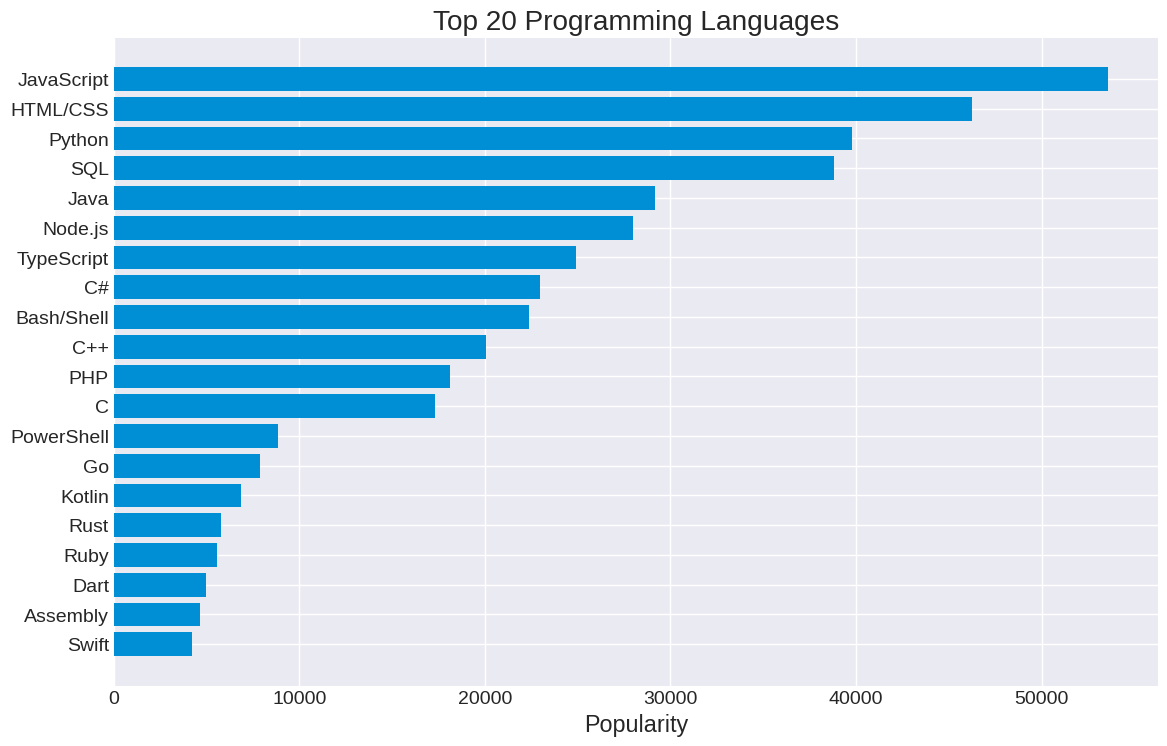

In [34]:
plot_n_most_common(20)

## Pie Charts

In [35]:
# Note: the `whole` is the sum of the slices. It (the sum) needn't be 100.
slices = [60, 40]

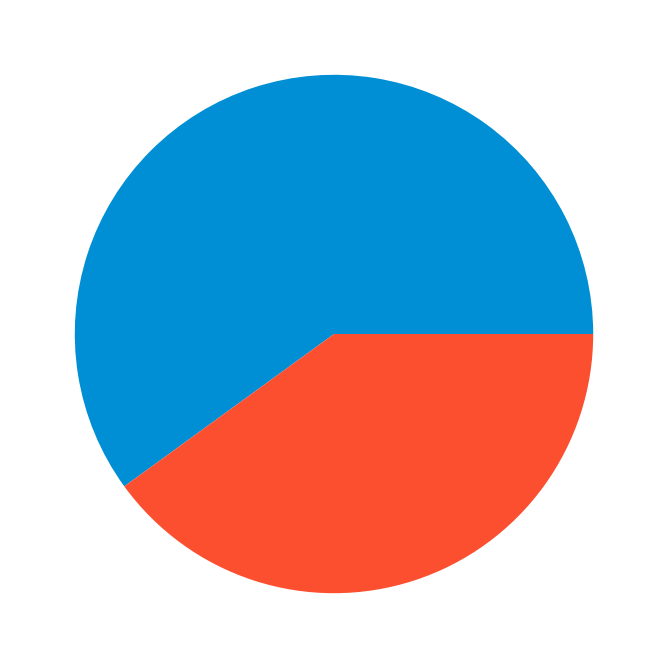

In [36]:
plt.pie(slices)
plt.show()

This isn't very useful, since we don't have any indication of the parts.

In [37]:
labels = ['Sixty', 'Forty']

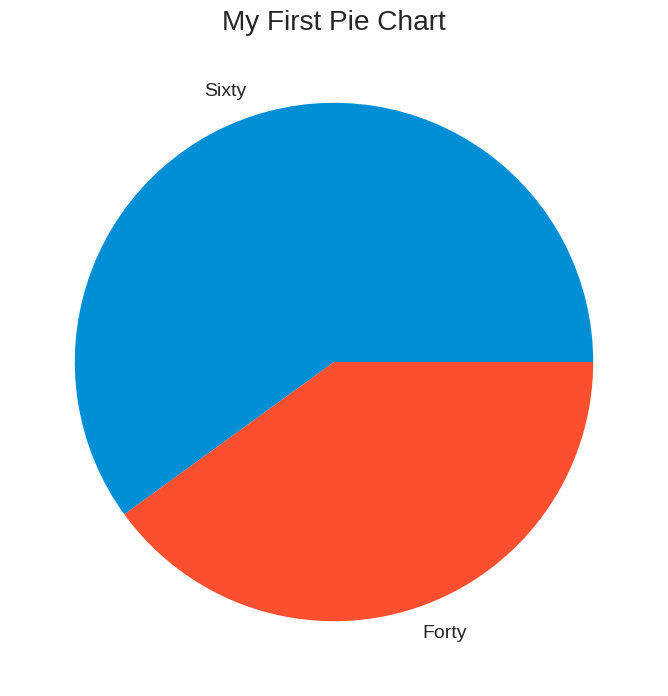

In [38]:
plt.title('My First Pie Chart')

plt.pie(
    slices,
    labels=labels
)

plt.show()

In [39]:
# Set the colors of the slices.
slices = [120, 80, 30, 20]
labels = ['Cat1', 'Cat2', 'Extra1', 'Extra2']
colors = ['blue', 'red', 'yellow', 'green']

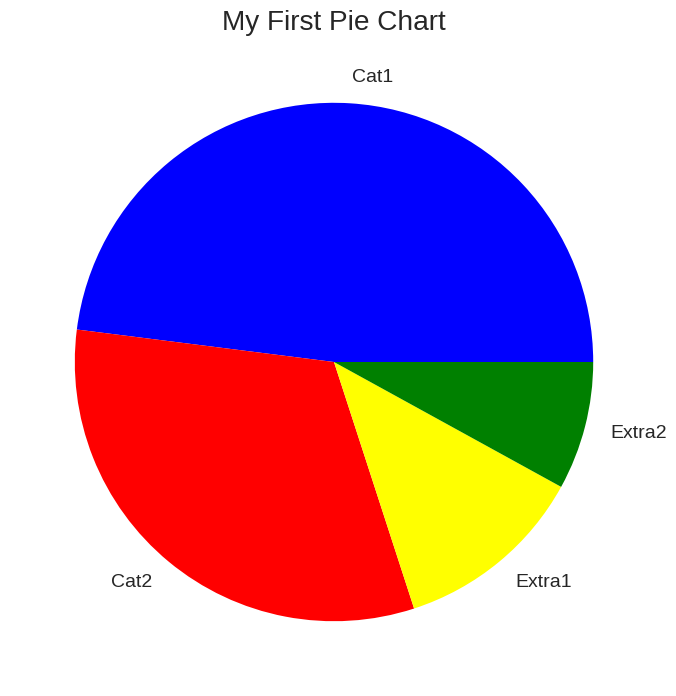

In [40]:
plt.title('My First Pie Chart')

plt.pie(
    slices,
    labels=labels,
    colors=colors,
)

plt.show()

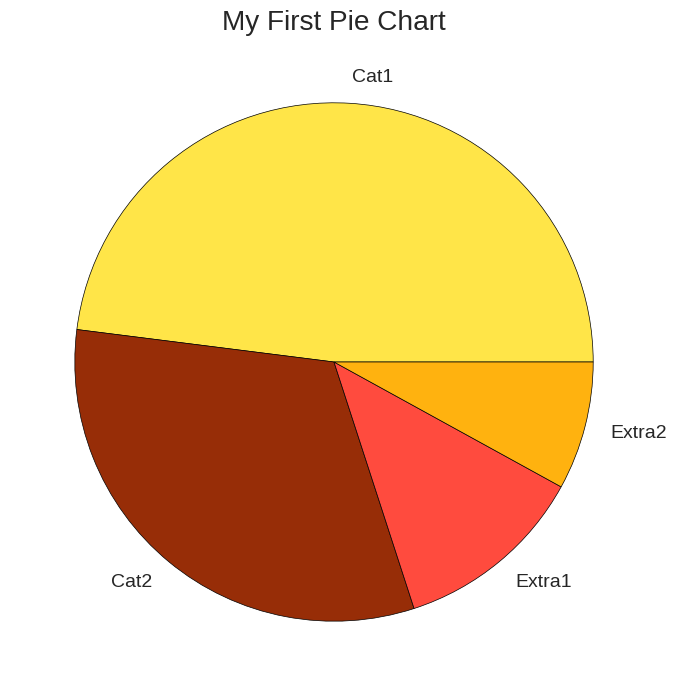

In [41]:
# We can also use hex colors.
# You can pick a pallet from here: https://coolors.co/
colors_hex = ['#FFE548', '#972D07', '#FF4B3E', '#FFB20F']

plt.title('My First Pie Chart')

plt.pie(
    slices,
    labels=labels,
    colors=colors_hex,
    wedgeprops={'edgecolor': 'black'} # Change outline color.
)

plt.show()

Let's view the top programming languages as a pie chart!

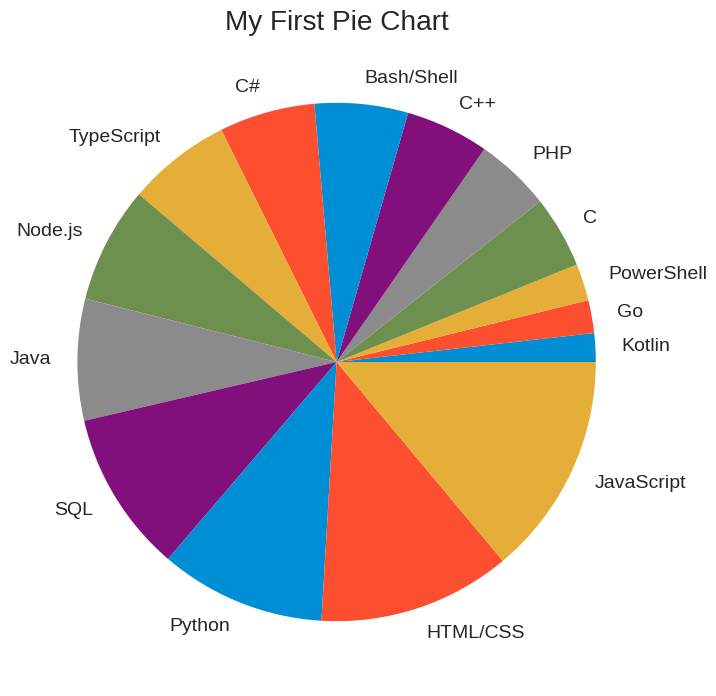

In [42]:
labels, slices = get_n_most_common(15)

plt.title('My First Pie Chart')

plt.pie(
    slices,
    labels=labels,
)

plt.show()

In [43]:
labels, slices = get_n_most_common(5)
labels, slices

((np.str_('Java'),
  np.str_('SQL'),
  np.str_('Python'),
  np.str_('HTML/CSS'),
  np.str_('JavaScript')),
 (29162, 38835, 39792, 46259, 53587))

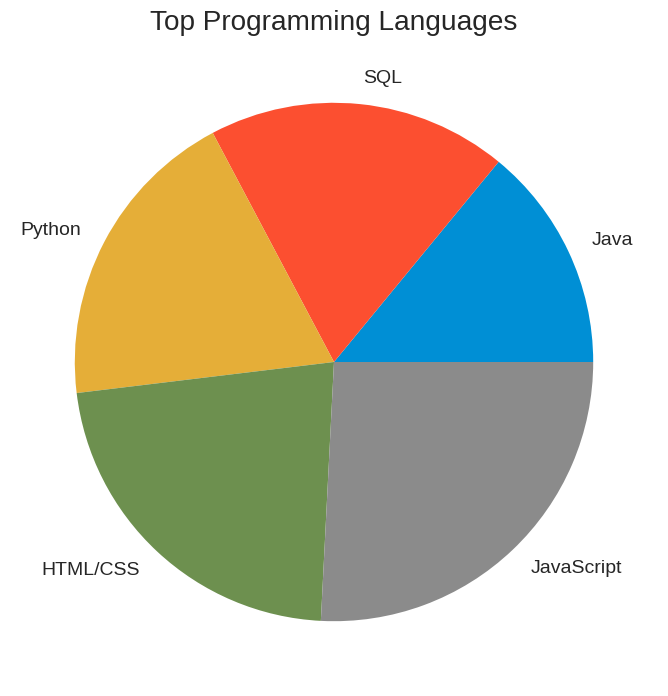

In [44]:
plt.title('Top Programming Languages')

plt.pie(
    slices,
    labels=labels,
)

plt.show()

If we want to put emphasis on a specific category, we could use the `.explode` method.

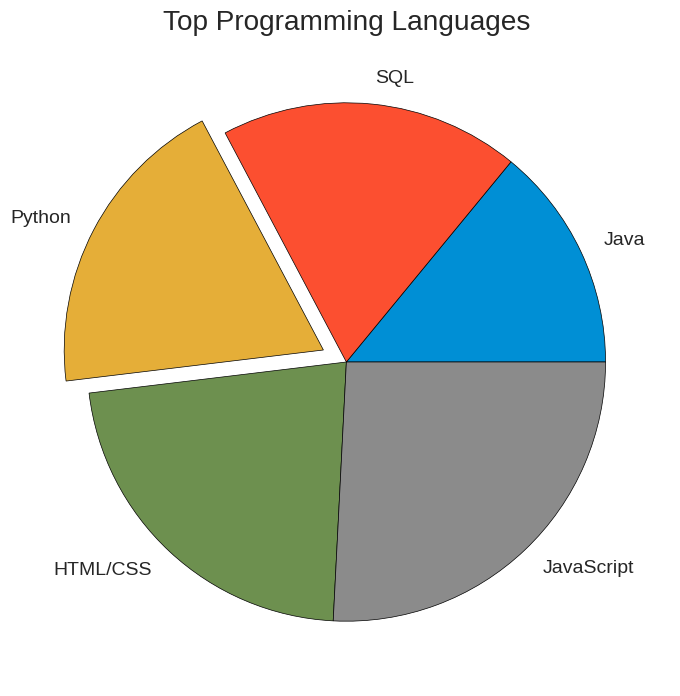

In [45]:
explode = [0, 0, 0.1, 0, 0]

plt.title('Top Programming Languages')

plt.pie(
    slices,
    labels=labels,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

plt.show()

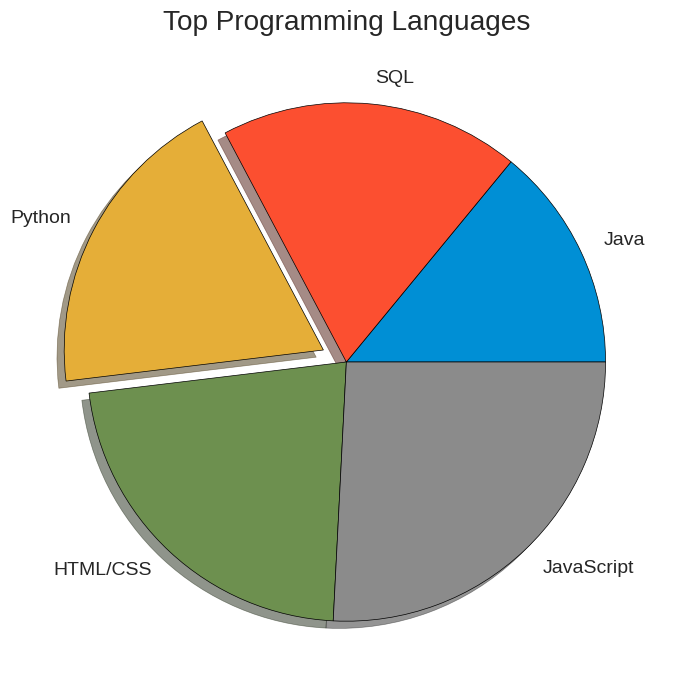

In [46]:
# We can add a shadow
explode = [0, 0, 0.1, 0, 0]

plt.title('Top Programming Languages')

plt.pie(
    slices,
    labels=labels,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.show()

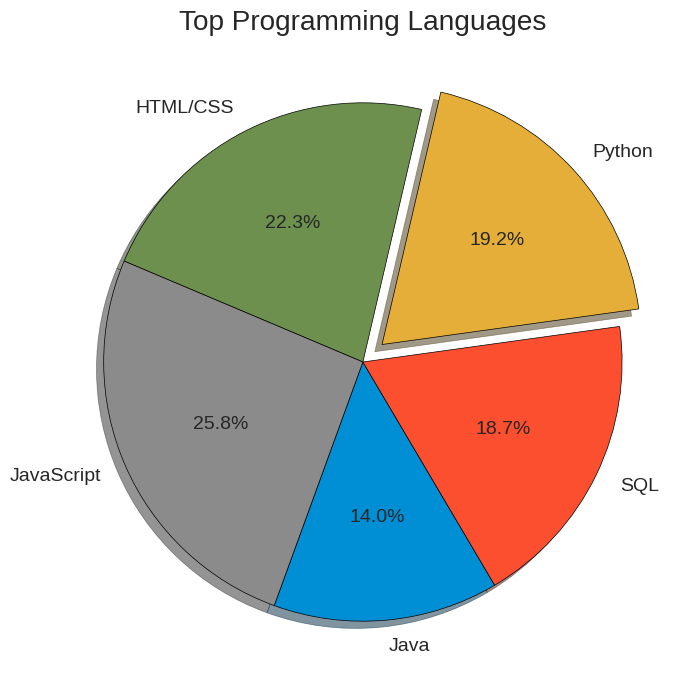

In [47]:
# Display the percentage that each slice takes up.
explode = [0, 0, 0.1, 0, 0]

plt.title('Top Programming Languages')

plt.pie(
    slices,
    labels=labels,
    explode=explode,
    shadow=True,
    startangle=250,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)

plt.show()

## Stack plot / Area plot

In [48]:
# Let's assume that we're tracking how many points a player scores
# up to a given minute over the course of 9 minutes.
# We want to see how the proportions change.

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

plr1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
plr2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
plr3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

labels = ['Player 1', 'Player 2', 'Player 3']

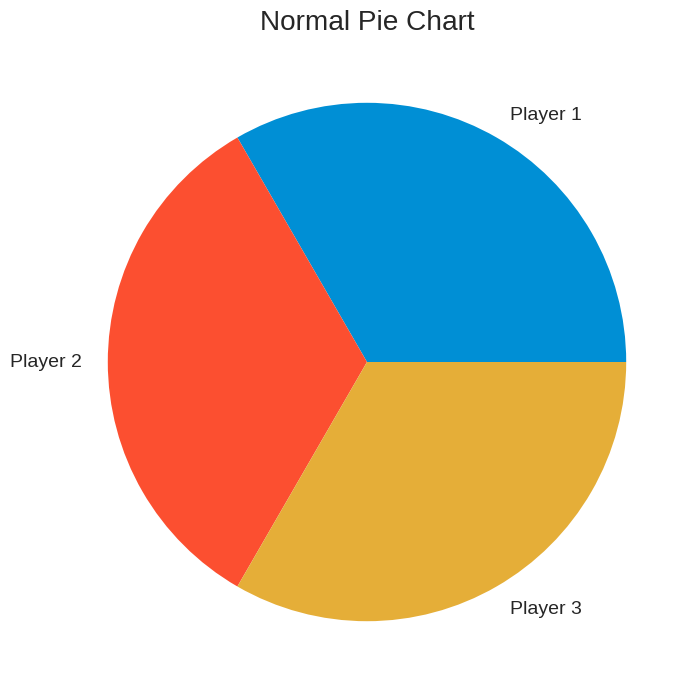

In [49]:
# Let's plot the data for the first minute

plt.title('Normal Pie Chart')

plt.pie([1, 1, 1], labels=labels)

plt.show()

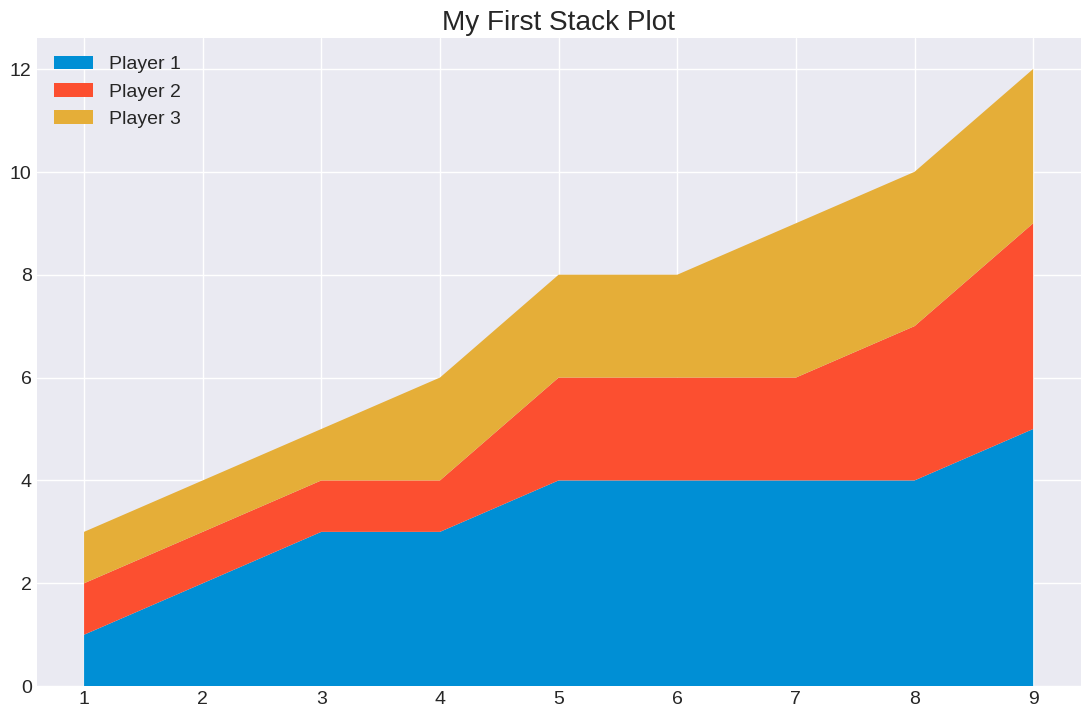

In [50]:
# Let's plot the data for the first minute

plt.title('My First Stack Plot')

plt.stackplot(minutes, plr1, plr2, plr3, labels=labels)

plt.legend()
plt.show()

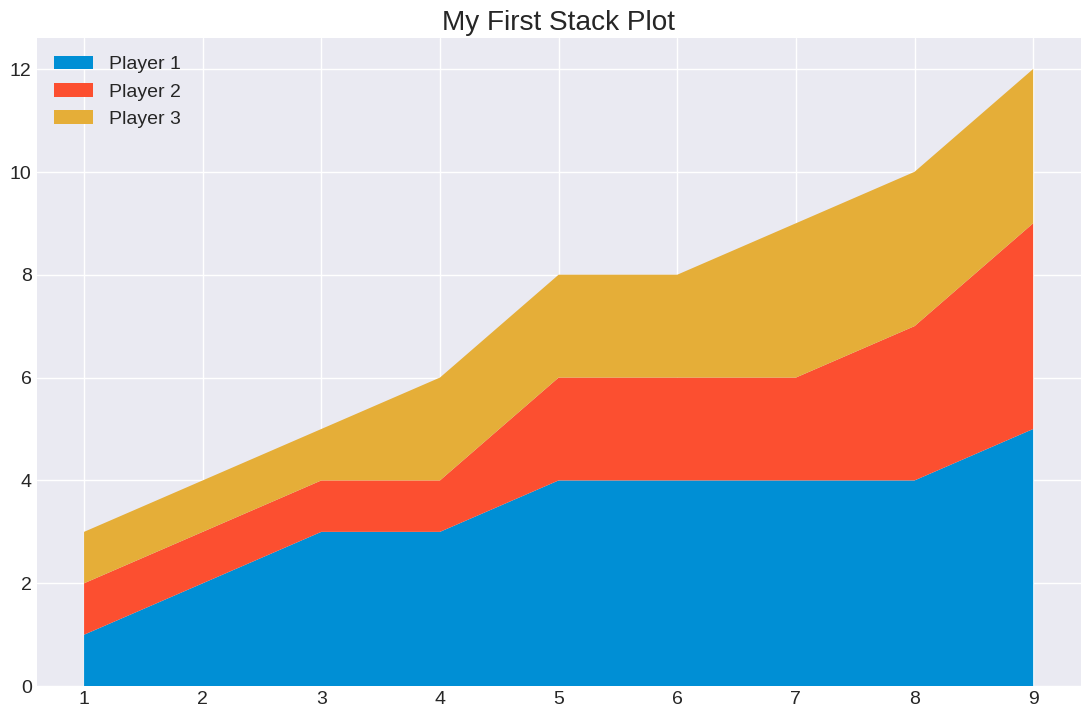

In [51]:
plt.title('My First Stack Plot')

plt.stackplot(minutes, plr1, plr2, plr3, labels=labels)

plt.legend(loc='upper left') # We can set the position for the legend.
plt.show()

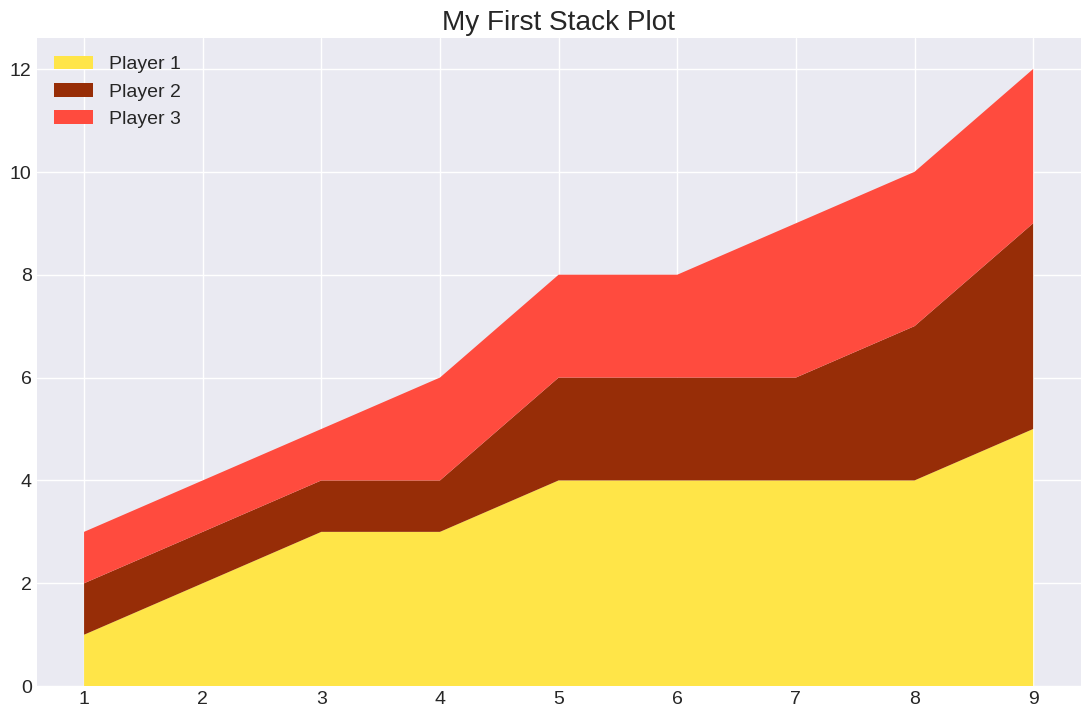

In [52]:
player_data = [plr1, plr2, plr3]

plt.title('My First Stack Plot')

plt.stackplot(
    minutes,
    player_data, # Also use multidimensional data
    labels=labels,
    colors=colors_hex[:3]
)

plt.legend(loc='upper left') # We can set the position for the legend.
plt.show()

We can use stack plots to see what percentage of work gets done by developers.

In [53]:
days = [1, 2, 3, 4, 5, 6, 7, 8, 9]

dev1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
dev2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
dev3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

dev_data = [dev1, dev2, dev3]

labels = ['Dev 1', 'Dev 2', 'Dev 3']

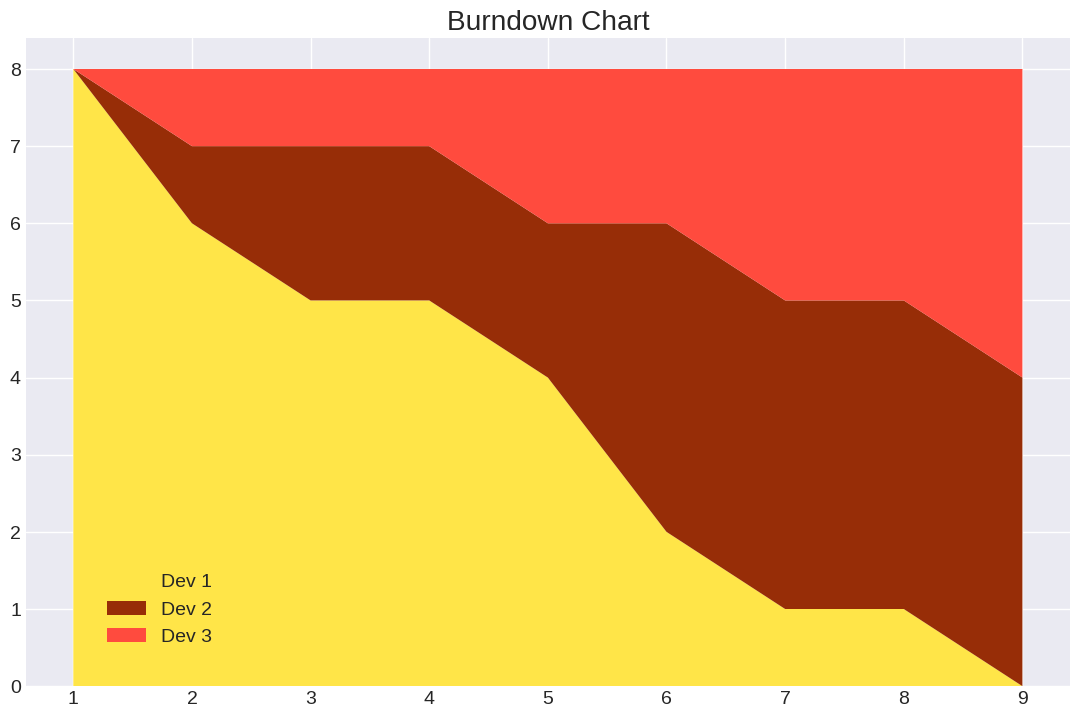

In [54]:
plt.title('Burndown Chart')

plt.stackplot(
    days,
    dev_data,
    labels=labels,
    colors=colors_hex[:3]
)

# We can use coordinates to offset the legend.
# Think of them as percentage from axis x/y/z, etc.
plt.legend(loc=(0.07, 0.05))
plt.show()

## Histograms

Create a histogram that shows the distribution of coding experience.

In [55]:
# Take all rows that have a value in the `YearsCode` column.
cond_years_code = ~df['YearsCode'].isna()
df[cond_years_code].head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,NaN,...,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
8,I am a student who is learning to code,"Student, full-time",Malaysia,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School;Online Courses or Certification,4,NaN,...,18-24 years old,Woman,No,Straight / Heterosexual,White or of European descent;Multiracial;South...,None of the above,None of the above,Appropriate in length,Easy,NaN
9,I am a developer by profession,Employed part-time,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp,6,4,...,25-34 years old,Man,No,NaN,South Asian,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,NaN


In [56]:
years_code = df.loc[cond_years_code, 'YearsCode']
years_code

ResponseId
2         7
5        17
7         3
8         4
9         6
         ..
83435     6
83436     4
83437    10
83438     5
83439    14
Name: YearsCode, Length: 81641, dtype: object

In [57]:
years_code.unique()

array(['7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9', '26',
       '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22', '2',
       '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       'More than 50 years', '27', '41', '42', '35', '23', '28', '11',
       '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47',
       '49', '48'], dtype=object)

> **Note**: This is an object column, so we'll replace `Less than 1 year` with 0 and `More than 50 years` with 55 so we can put it in a bin 50 - 60.

In [58]:
years_code = years_code.replace({
  'Less than 1 year': 0,
  'More than 50 years': 55   
})

years_code.unique()

array(['7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9', '26',
       '14', '39', '20', '8', '19', '5', 0, '22', '2', '1', '34', '21',
       '13', '25', '24', '30', '31', '18', '38', 55, '27', '41', '42',
       '35', '23', '28', '11', '37', '44', '43', '36', '33', '45', '29',
       '50', '46', '32', '47', '49', '48'], dtype=object)

In [59]:
years_code = years_code.astype(int)
years_code

ResponseId
2         7
5        17
7         3
8         4
9         6
         ..
83435     6
83436     4
83437    10
83438     5
83439    14
Name: YearsCode, Length: 81641, dtype: int64

In [60]:
bins = [0, 10, 20, 30, 40, 50, 60]

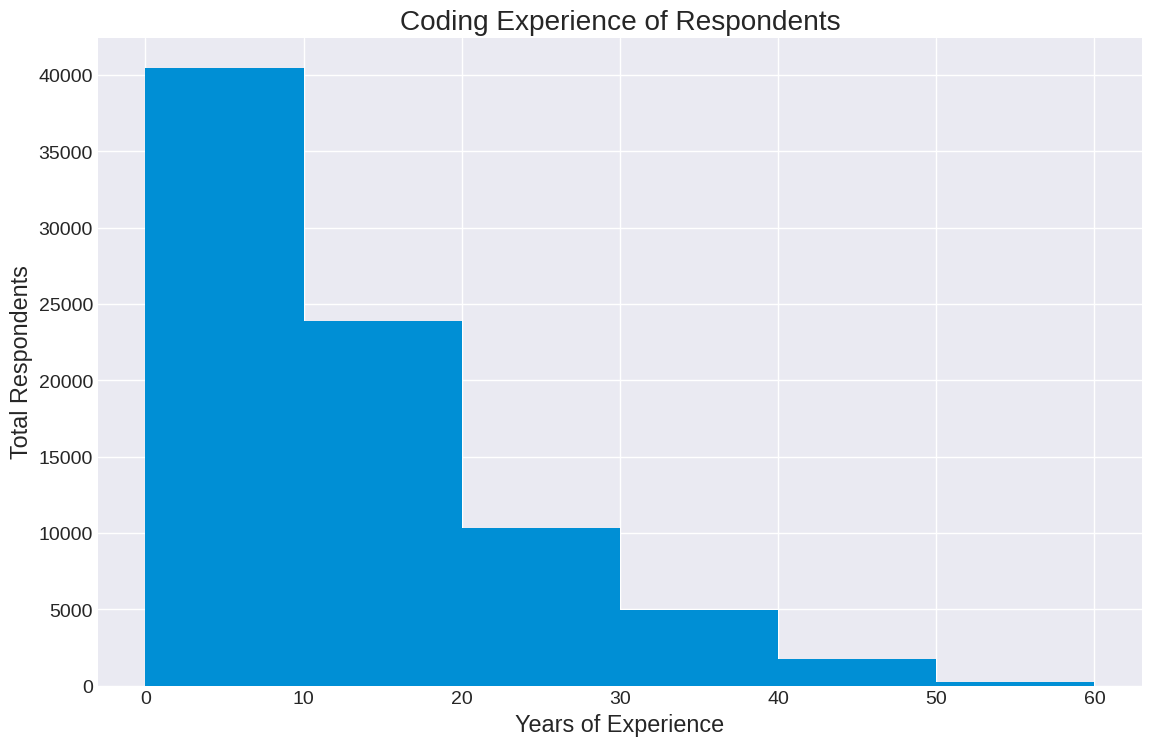

In [61]:
plt.title('Coding Experience of Respondents')
plt.xlabel('Years of Experience')
plt.ylabel('Total Respondents')

plt.hist(years_code, bins=bins)
plt.show()

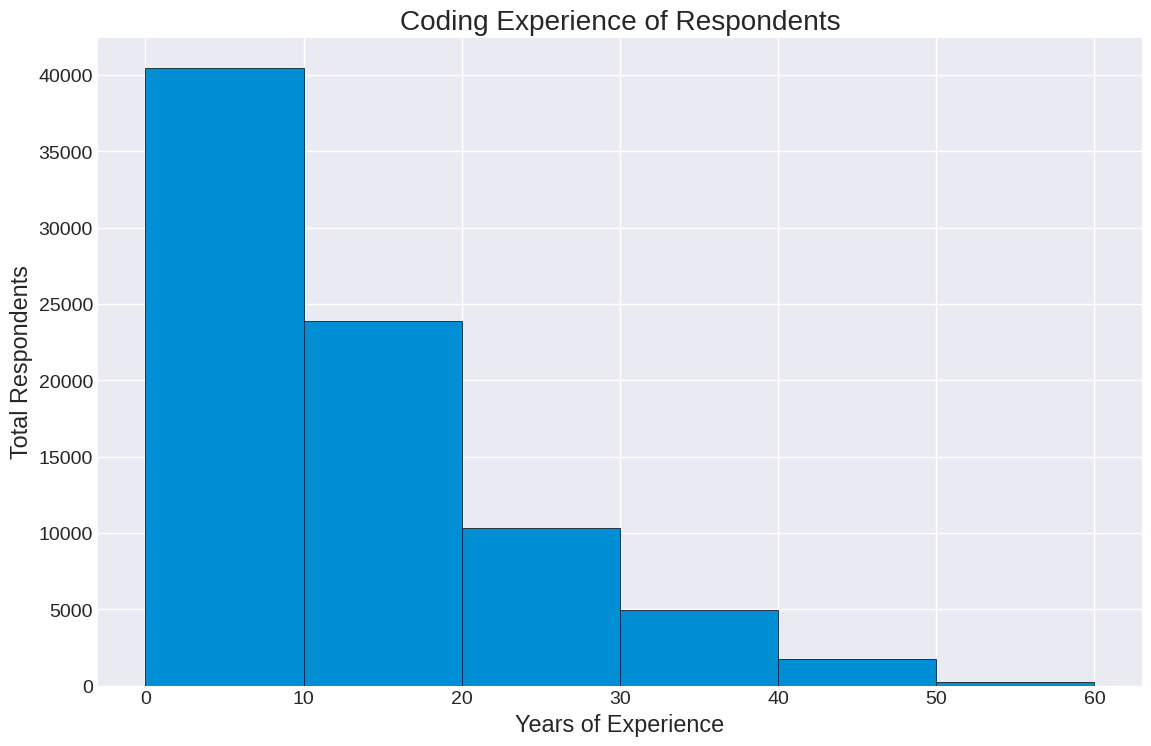

In [62]:
# Add an edge color, so the bins are outlined.
plt.title('Coding Experience of Respondents')
plt.xlabel('Years of Experience')
plt.ylabel('Total Respondents')

plt.hist(years_code, bins=bins, edgecolor='black')
plt.show()

Add the center metrics for coding experience.

In [63]:
years_code.median()

np.float64(10.0)

In [64]:
years_code.mean()

np.float64(12.346529317377298)

In [65]:
years_code.mode()[0]

np.int64(5)

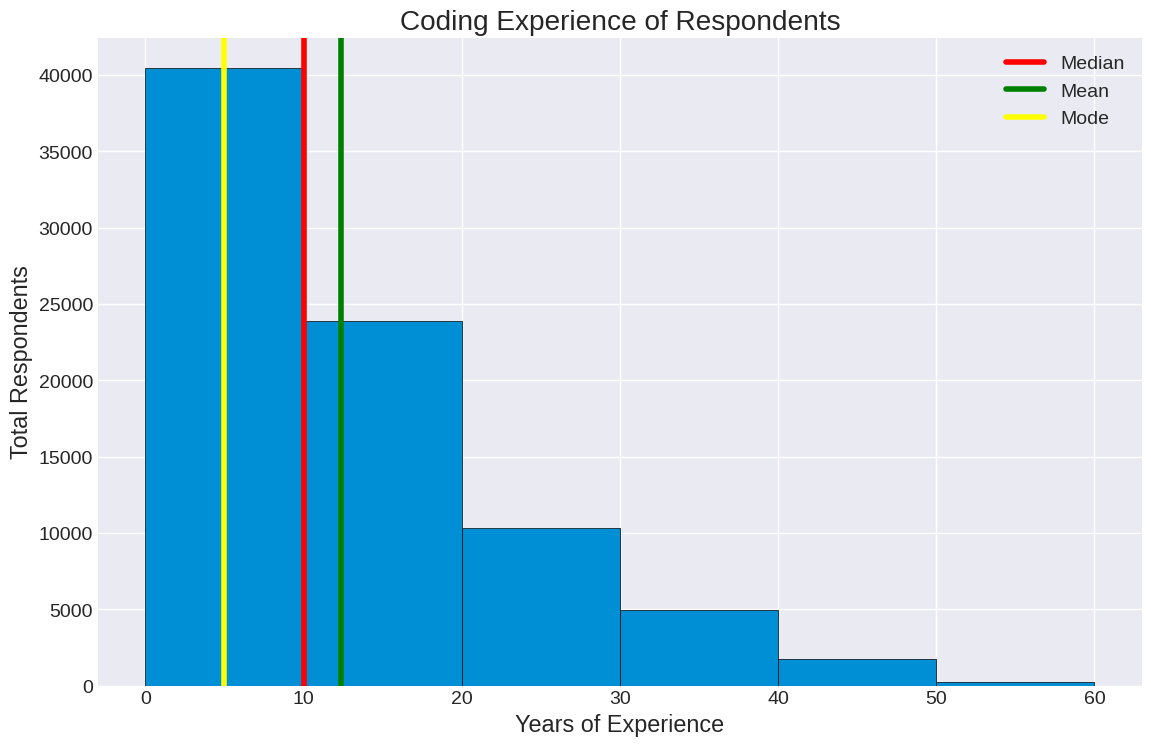

In [66]:
plt.title('Coding Experience of Respondents')
plt.xlabel('Years of Experience')
plt.ylabel('Total Respondents')

plt.hist(years_code, bins=bins, edgecolor='black')

plt.axvline(years_code.median(), color='red', label='Median')
plt.axvline(years_code.mean(), color='green', label='Mean')
plt.axvline(years_code.mode()[0], color='yellow', label='Mode')

plt.legend()
plt.show()

See how the mean is greater than the median? This is why we can say that the data for coding experience is **SKEWED** to the right. If the mean was less than the median, then the data would be skewed to the left.

What distribution then has a matching mean and median?

## Scatter Plots

In [67]:
# Show an example using sample data.
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

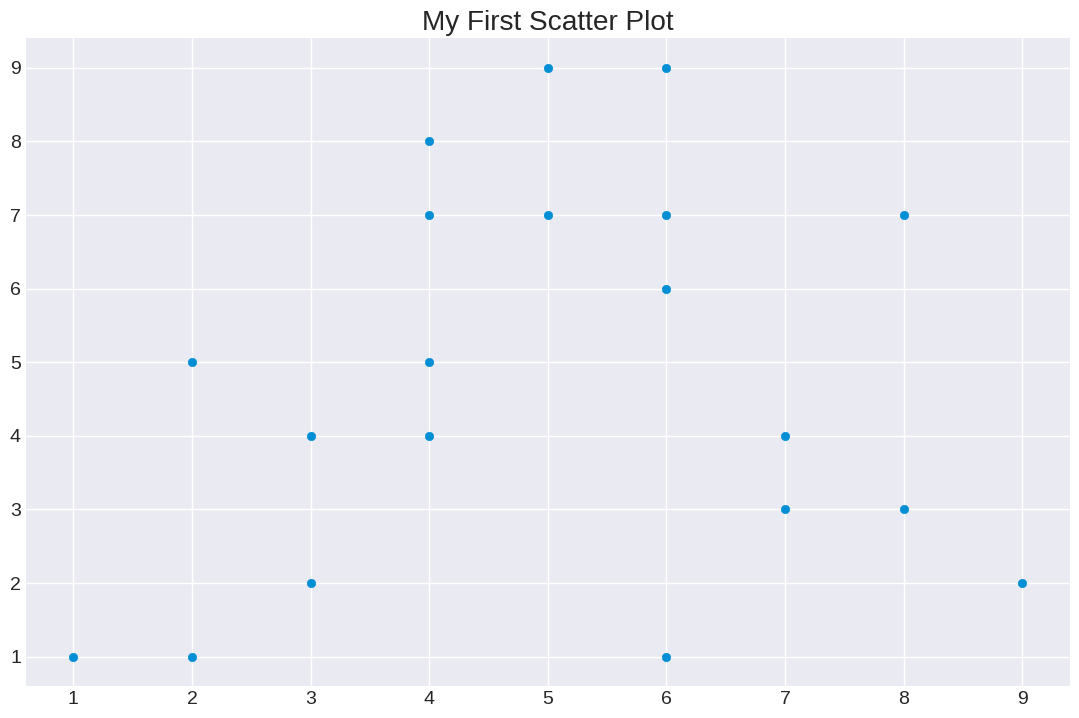

In [68]:
plt.title('My First Scatter Plot')

plt.scatter(x, y)

plt.show()

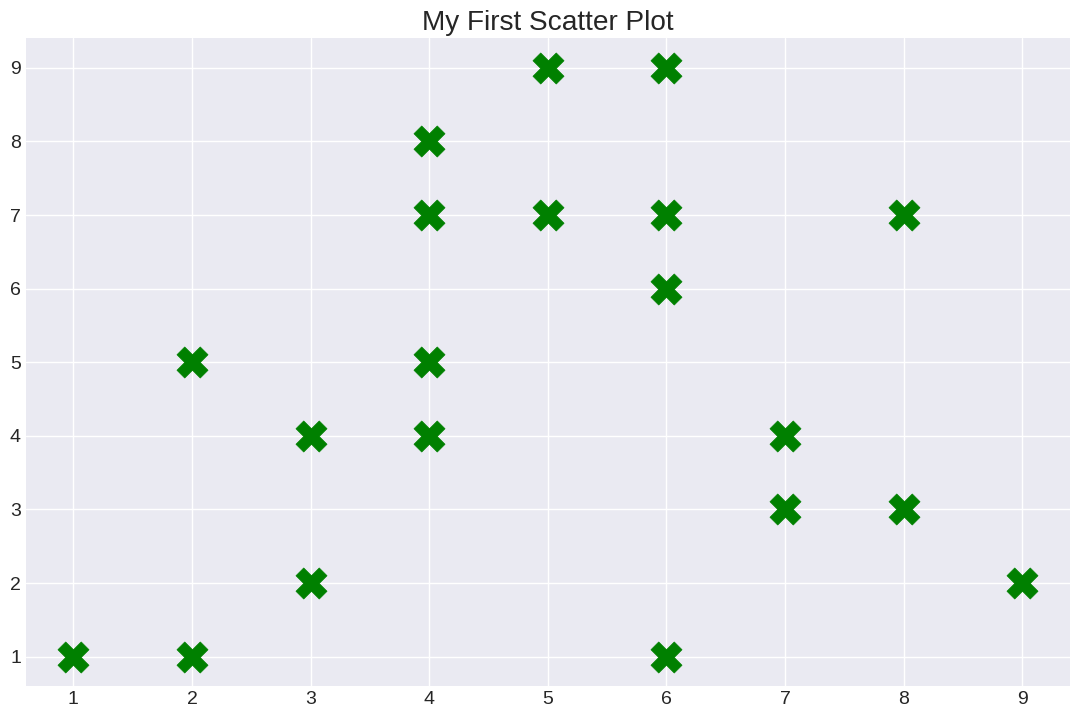

In [69]:
# We can add some styles
# s      -> size
# c      -> color
# marker -> change the circle into something else
plt.title('My First Scatter Plot')

plt.scatter(x, y, s=500, c='green', marker='X')

plt.show()

In [70]:
# We can also change the individual color of every marker.
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]

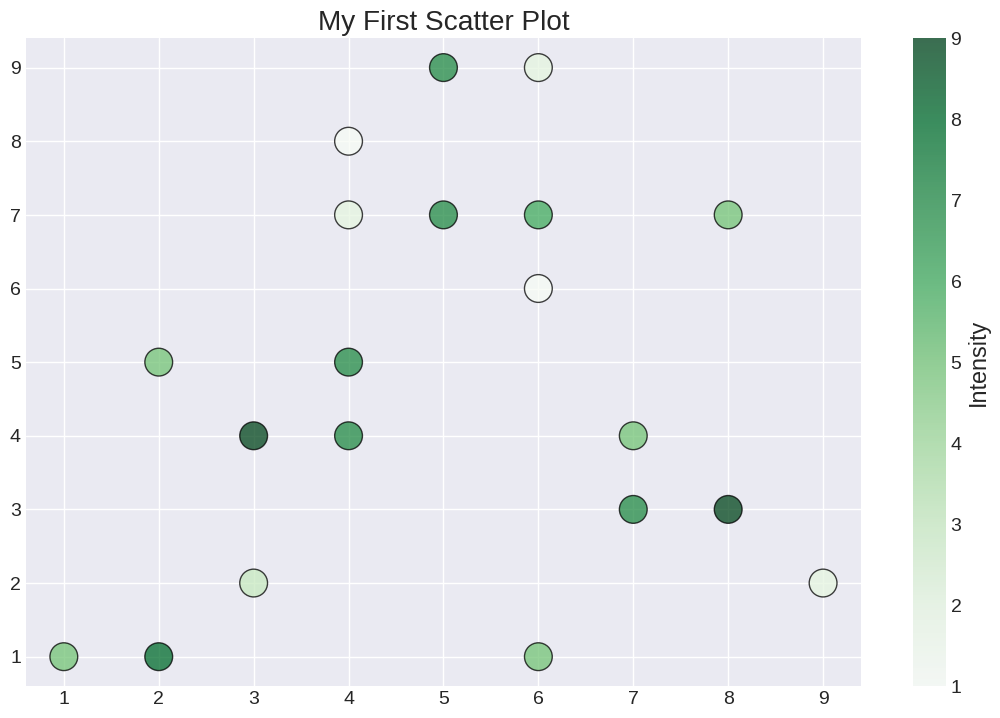

In [71]:
plt.title('My First Scatter Plot')

plt.scatter(x, y,
  s=400,
  c=colors,
  cmap='Greens',
  edgecolor='black',
  linewidth=1,
  alpha=0.75
)

cbar = plt.colorbar()
cbar.set_label('Intensity')

plt.show()

In [72]:
# Here's what a good correlation looks like

# Get evenly spaced numbers with a step of 10
x = np.arange(0, 101, 10)
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [73]:
# Introduce noise
y=np.random.normal(2*x+2,20)
y

array([  3.18205258,  50.93176994,  37.214843  ,  95.12432577,
        58.82425043, 102.16896179, 129.43997555, 110.83140527,
       166.26794754, 186.95431751, 209.7026965 ])

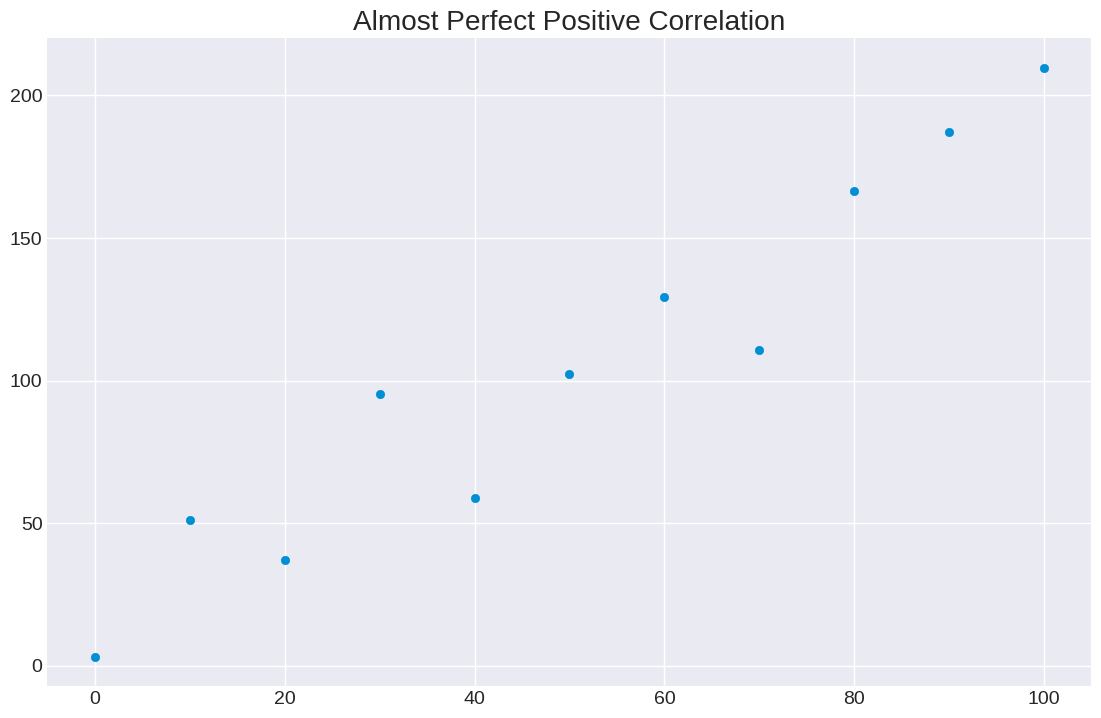

In [74]:
plt.title('Almost Perfect Positive Correlation')

plt.scatter(x, y)

plt.show()

In [75]:
np.corrcoef(x, y)

array([[1.       , 0.9590217],
       [0.9590217, 1.       ]])

Notice the number of the second diagonal: is greater than **95%** !!! If `x` was a feature and `y` was the target, then you basically found a way to predict `y` for any value of `x`. Think of what that can do on the stock market!

Let's see an almost perfect negative correlation.

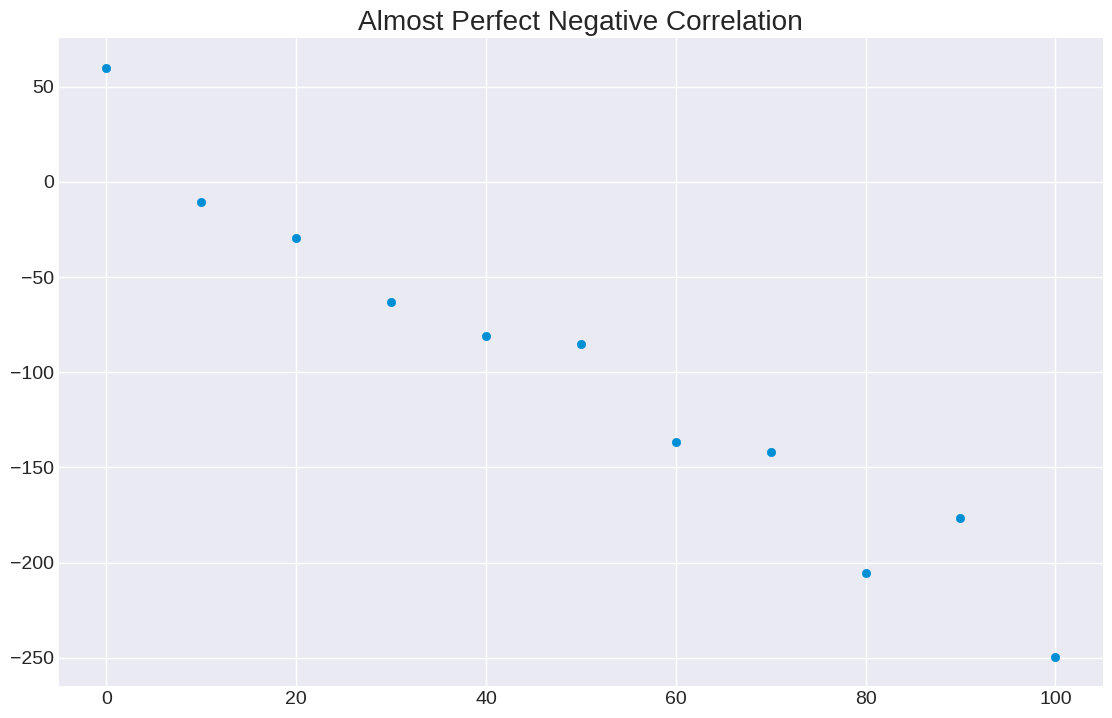

In [76]:
x = np.arange(0, 101, 10)
y=np.random.normal(-2*x-2,20)

plt.title('Almost Perfect Negative Correlation')
plt.scatter(x, y)
plt.show()

In [77]:
np.corrcoef(x, y)

array([[ 1.        , -0.97770916],
       [-0.97770916,  1.        ]])

Create a scatter plot of `YearsCodePro` vs `Salary` of the top 200 respondents with highest salaries. The goal is to see whether having more professional coding experience is correlated with having a higher salary.

What do you think?

In [78]:
# Step 1: Get all columns that have an entry in both columns.
cond_ycpr = df['YearsCodePro'].notna()
cond_sal = ~df['ConvertedCompYearly'].isna()

df_code_sal = df[cond_ycpr & cond_sal]
df_code_sal.head()

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,4,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
12,I am a developer by profession,Employed full-time,Spain,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent;Hispanic or Latin...,None of the above,None of the above,Too long,Easy,46482.0
13,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Other (please specify):,15,6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Appropriate in length,Easy,77290.0
17,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,School,6,2,...,25-34 years old,Man,No,NaN,Middle Eastern,NaN,NaN,Appropriate in length,Neither easy nor difficult,17748.0
18,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,9,6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,46135.0


In [79]:
# Step 2: Take only the columns of interest.
df_code_sal = df_code_sal[['YearsCodePro', 'ConvertedCompYearly']]
df_code_sal

,YearsCodePro,ConvertedCompYearly
ResponseId,,
10,4,51552.0
12,5,46482.0
13,6,77290.0
17,2,17748.0
18,6,46135.0
...,...,...
83435,5,160500.0
83436,2,3960.0
83437,4,90000.0


In [80]:
# Step 3: Sort the dataframe by the salary column.
df_code_sal = df_code_sal.sort_values(by='ConvertedCompYearly', ascending=False)
df_code_sal

,YearsCodePro,ConvertedCompYearly
ResponseId,,
66911,21,45241312.0
65400,3,30468516.0
40587,13,21822250.0
28792,9,20000000.0
12701,5,19200000.0
...,...,...
15164,1,2.0
56791,2,2.0
24286,9,1.0


In [81]:
# Step 4: Get only the first 200 entries.
df_code_sal = df_code_sal.head(200)
df_code_sal

,YearsCodePro,ConvertedCompYearly
ResponseId,,
66911,21,45241312.0
65400,3,30468516.0
40587,13,21822250.0
28792,9,20000000.0
12701,5,19200000.0
...,...,...
52833,15,2820000.0
31517,4,2800000.0
52379,21,2700000.0


Check `dtypes` and presense of any `np.NaN`s.

In [82]:
df_code_sal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 66911 to 39325
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsCodePro         200 non-null    object 
 1   ConvertedCompYearly  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [83]:
# Step 5: Convert the `YearsCodePro` column into a number.
df_code_sal['YearsCodePro'].unique()

array(['21', '3', '13', '9', '5', '1', '20', '19', '33', '7', '24', '10',
       '23', '15', '11', '35', '26', '30', '4', '14', '8', '6',
       'Less than 1 year', '2', '16', '12', '17', '18'], dtype=object)

In [84]:
df_code_sal = df_code_sal.copy()

df_code_sal['YearsCodePro'] = df_code_sal['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '55'
})

df_code_sal['YearsCodePro'].unique()

array(['21', '3', '13', '9', '5', '1', '20', '19', '33', '7', '24', '10',
       '23', '15', '11', '35', '26', '30', '4', '14', '8', '6', '0', '2',
       '16', '12', '17', '18'], dtype=object)

In [85]:
df_code_sal['YearsCodePro'] = df_code_sal['YearsCodePro'].astype(float)
df_code_sal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 66911 to 39325
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearsCodePro         200 non-null    float64
 1   ConvertedCompYearly  200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


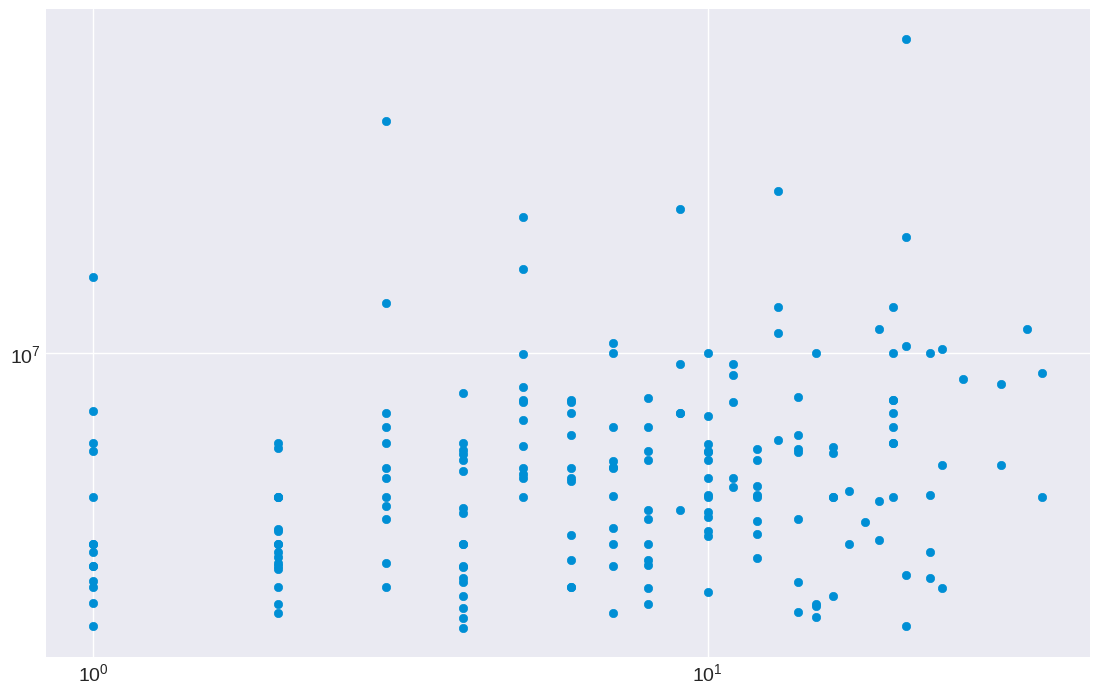

In [86]:
# Step 6: Is there a correlation?
plt.scatter(df_code_sal['YearsCodePro'], df_code_sal['ConvertedCompYearly'])

plt.yscale('log')
plt.xscale('log')

plt.show()

In [87]:
df_code_sal.corr()

,YearsCodePro,ConvertedCompYearly
YearsCodePro,1.000000,0.209086
ConvertedCompYearly,0.209086,1.000000


The correlation is very low, hence, if we knew one value, we can't say much about the other.

## Extra: Plotting Time Series Data

In [88]:
from datetime import datetime, timedelta

In [89]:
dates = [
         datetime(2019, 5, 24),
         datetime(2019, 5, 25),
         datetime(2019, 5, 26),
         datetime(2019, 5, 27),
         datetime(2019, 5, 28),
         datetime(2019, 5, 29),
         datetime(2019, 5, 30),
]

y = [0, 1, 3, 4, 6, 5, 7]

/tmp/ipykernel_13393/836933732.py:1: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, y)


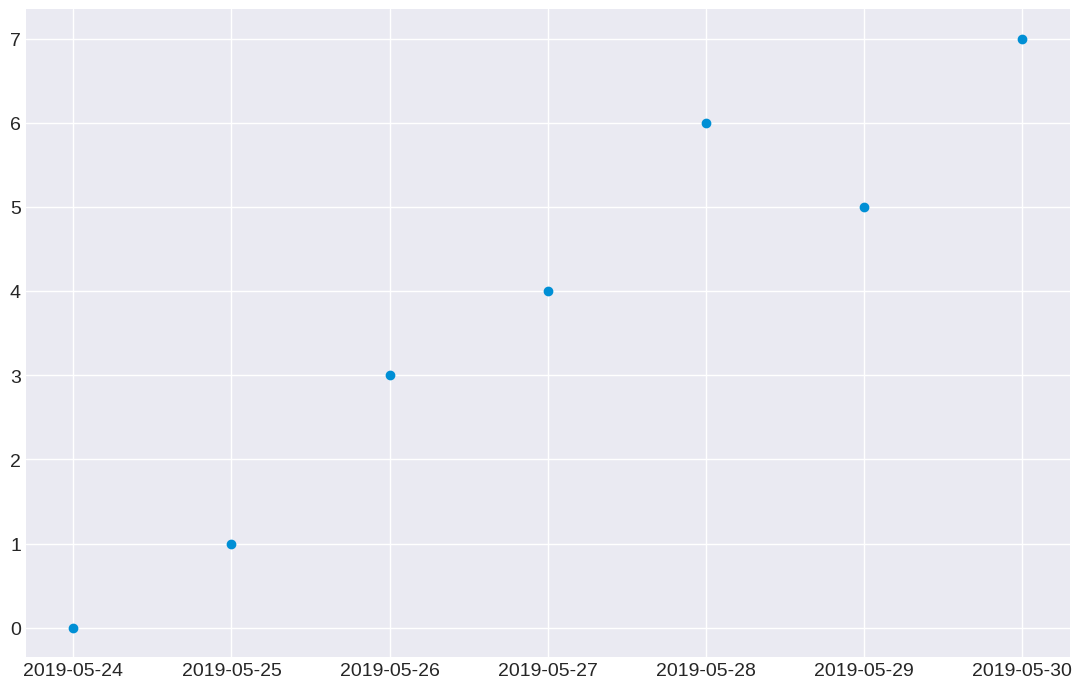

In [90]:
plt.plot_date(dates, y)
plt.show()

/tmp/ipykernel_13393/1447819310.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, y, linestyle='solid')


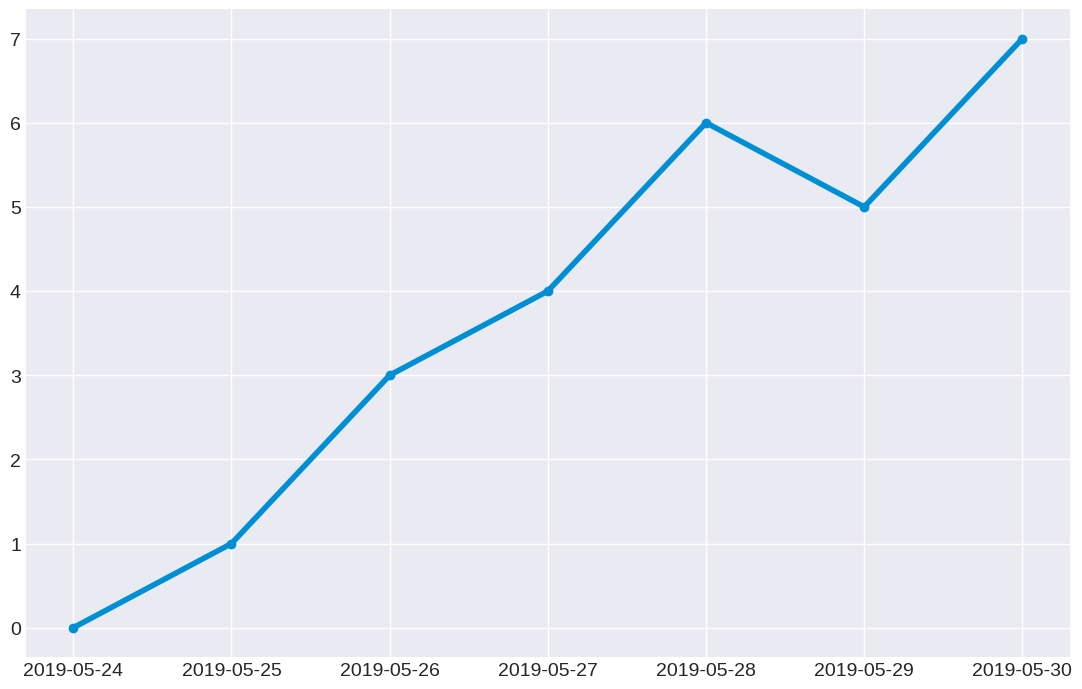

In [91]:
# Connect the dots.
plt.plot_date(dates, y, linestyle='solid')
plt.show()

/tmp/ipykernel_13393/977253136.py:2: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, y, linestyle='solid')


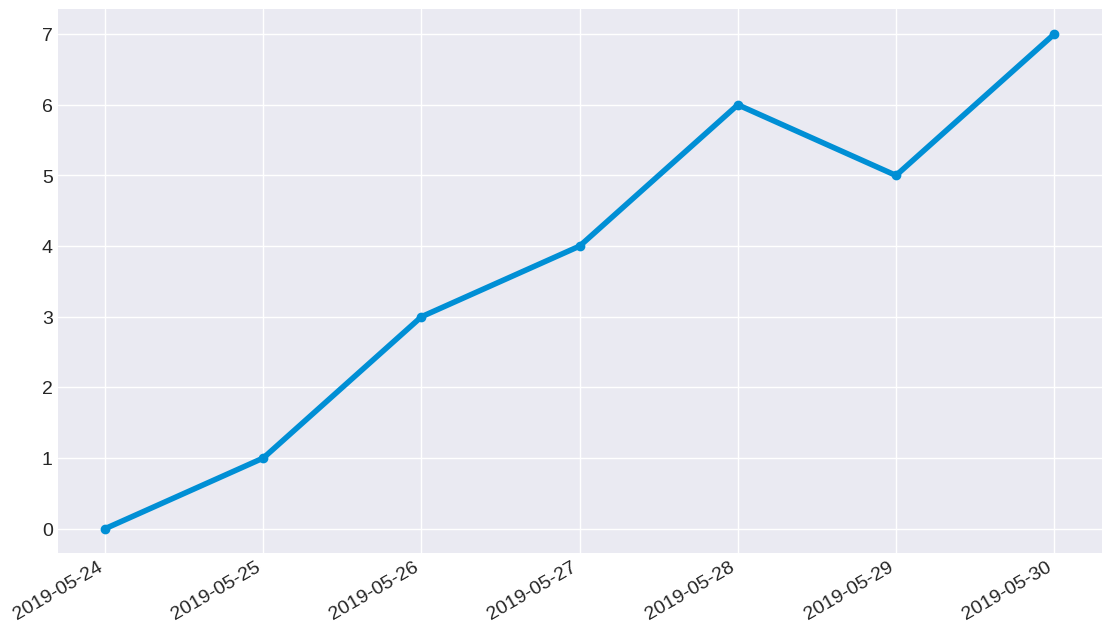

In [92]:
# Auto format the dates.
plt.plot_date(dates, y, linestyle='solid')

# gcf: Get Current Figure
plt.gcf().autofmt_xdate()

plt.show()

## Extra: Subplots

Create subplots for the popular languages.

In [93]:
def plot_n_most_common(n, ax):
  langs, pops = get_n_most_common(n)

  ax.set_title(f'Top {n} Programming Languages')
  ax.set_xlabel('Popularity')

  ax.barh(langs, pops)

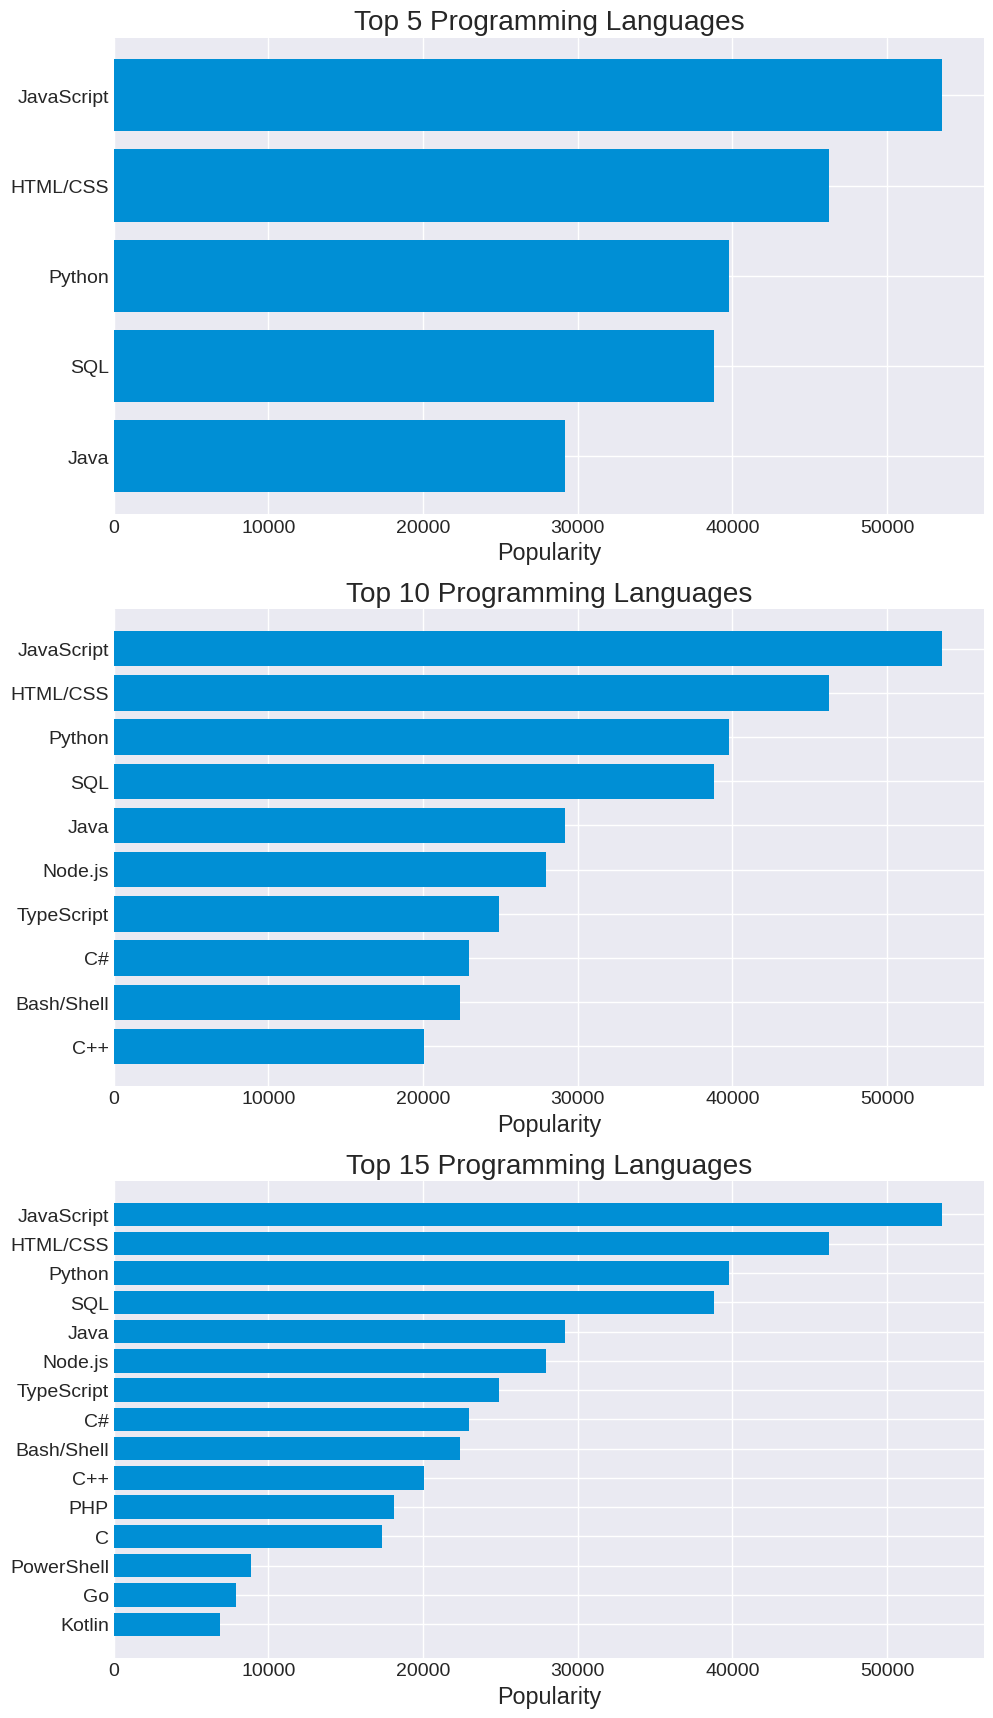

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

plot_n_most_common(5, ax1)
plot_n_most_common(10, ax2)
plot_n_most_common(15, ax3)

plt.show()